# <font color='red'>Data Mining and Business Intelligence: Heart Disease Prediction</font>
    
</div>
<img src="https://www.drbennyjose.com/wp-content/uploads/2021/05/heart-disease-treatment-in-baner-800x400.png">

# <font color='red'>Heart Disease Prediction</font> 

<div class="alert alert-block alert-info">   
<b>Steps:</b> 

1. Defining the problem 
2. Collecting the data
3. Data Exploration (EDA)
4. Data Visulaization
    1. Understanding the shape of the data (Histograms, box plots, Bar chart,pair plots etc.)
    
5. Data Cleaning (data preparation) 
    1. Identify and Handle Missing Values
    2. Remove duplicates
    3. Check for inconsistent or incorrect values
    4. Remove Outliers
    5. Standardize the Data
    6. Check for Data Integrity
    7. Transform the Data
    8. Export the Cleaned Data
    
6. Feature Engineering
7. Data Preprocessing for Model
8. Basic Model Building
9. Model Tuning
10. Model Evaluation

## <font color='Blue'>1. Defining the problem statement</font>  

<div class="alert alert-block alert-info">
<b>Requirements:</b> 
This project aims to leverage data mining techniques to develop a predictive model for heart disease based on a dataset comprising 303 individuals' health particulars. With healthcare being a vital domain for data mining applications, the project seeks to explore the heart disease dataset comprehensively. The dataset encompasses various parameters related to heart health, including age, gender, serum cholesterol, blood sugar levels, among others.
    
</div>

[Download Datasets](https://drive.google.com/drive/folders/1EQ2frFagPNShuCwSgZdeHaPHsWKDpjEQ)


## <font color='black'>Import Library</font>  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


## <font color='Blue'>2. Collecting the data</font>  

<div class="alert alert-block alert-info">
<b>Steps:</b>   
load dataset using Pandas
</div>

In [2]:
df = pd.read_csv('data/heart.csv')

## <font color='Blue'>3. Exploratory data analysis</font>  
<div class="alert alert-block alert-info">
<b>Steps:</b>   
Printing first 5 rows of the train dataset.
</div>

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div style="border-radius:10px; padding: 15px; background-color: "Blue"; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = female, 1 = male) |
| __cp__ | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| __ca__ | Number of major vessels (0-4) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

###  <font color='black'> 3.1 Dataset Basic Information</font>



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



<div class="alert alert-block alert-warning">
<b>Observation:</b> 

* __Number of Entries__: The dataset consists of __303 entries__, ranging from index 0 to 302.
    
    
* __Columns__: There are __14 columns__ in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* __Data Types__:
    - Most of the columns (13 out of 14) are of the __int64__ data type.
    - Only the oldpeak column is of the float64 data type.
    
    
* __Missing Values__: There isn't any missing values in the dataset as each column has 303 non-null entries.
    
</div>




    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2



<div class="alert alert-block alert-warning">
<b>Observation:</b> 

The method revealed that the range of each variable is different. The maximum value of age is 77 but for chol it is 564. Thus, feature scaling must be performed on the dataset. Feature scaling is a preprocessing step used to standardize the range of independent variables or features in the dataset. Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.
    
</div>




<h2> Check for missing values </h2>


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

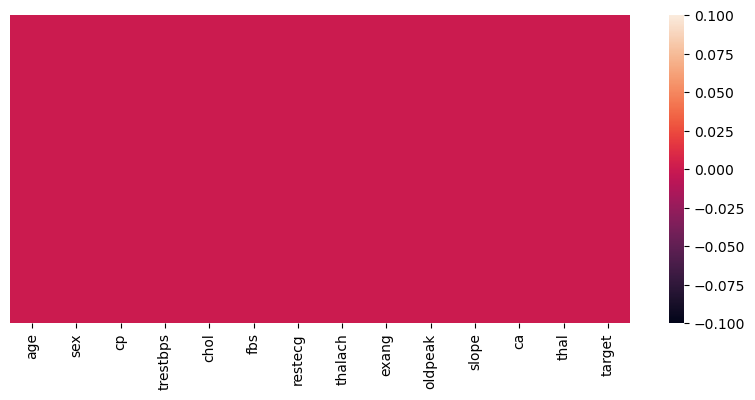

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)


<div class="alert alert-block alert-warning">
<b>Observation:</b> 

Based on our previous examination, it's clear that our dataset doesn't contain any missing values. This is advantageous because it alleviates the need for decisions regarding imputation or removal. Such decisions could potentially introduce bias or further diminish our already limited dataset size.
    
</div>

<h2>A Correlation Matrix to analyze the relationship between the attributes</h2>

<Axes: >

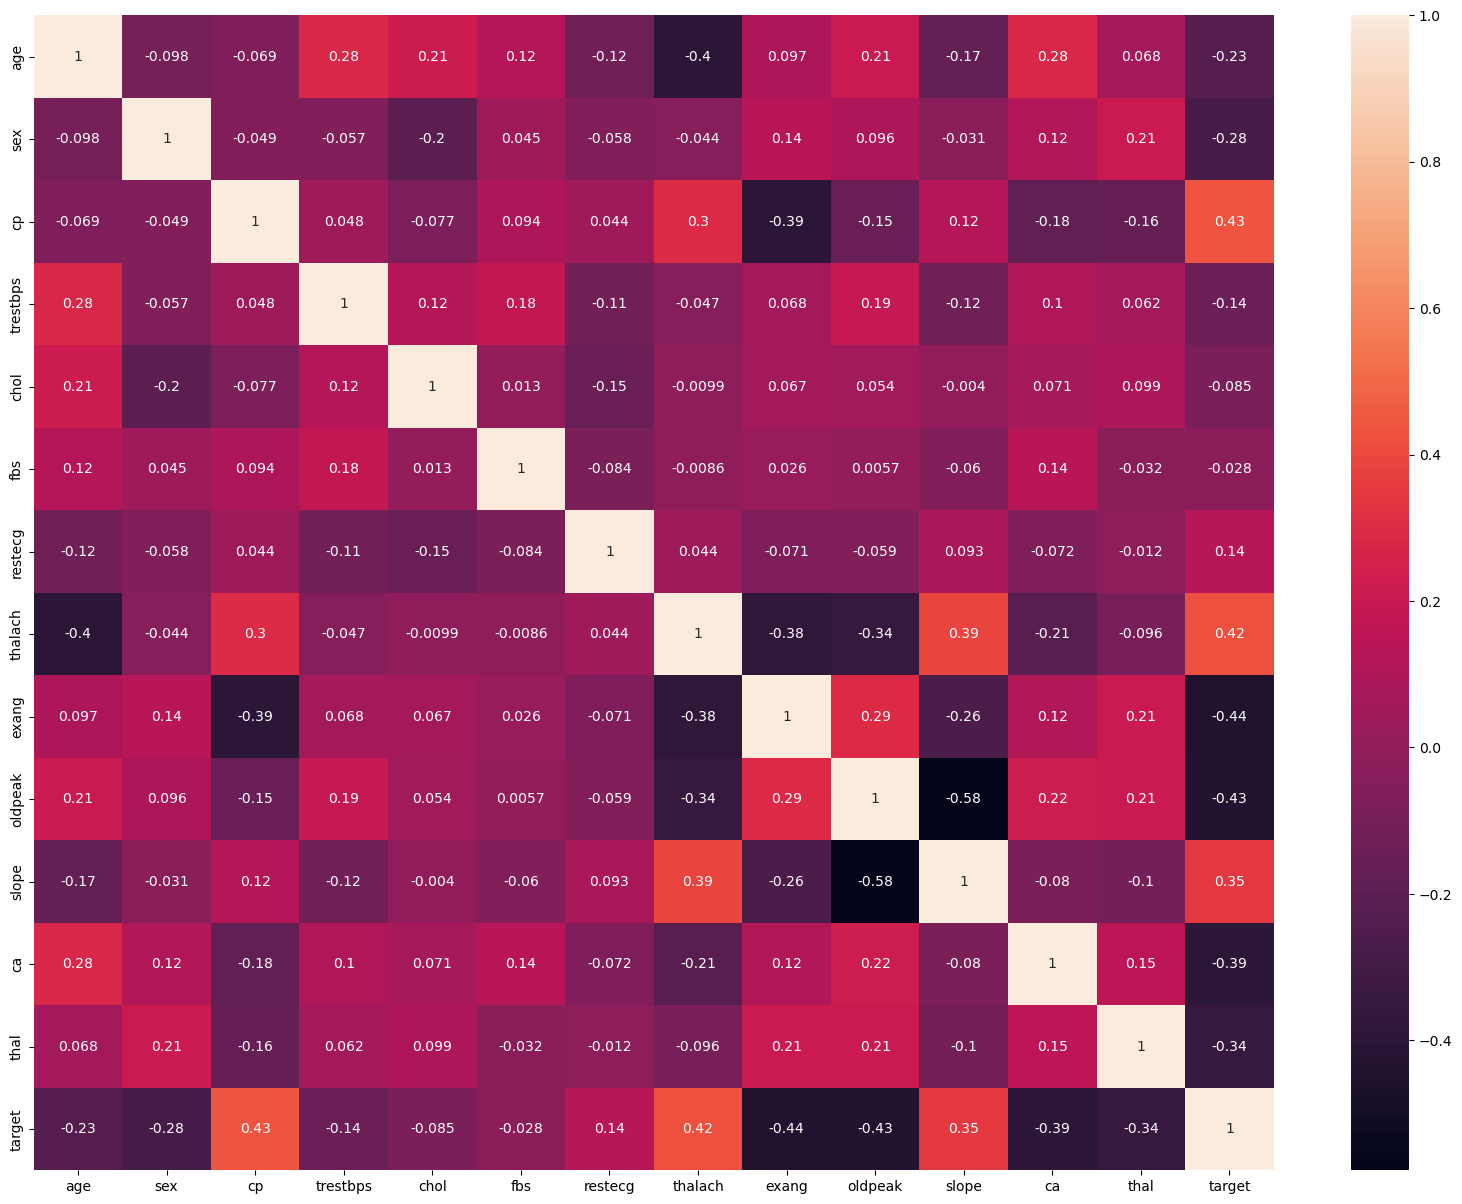

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)


<div class="alert alert-block alert-warning">
<b>Observation:</b> 

There isn't a single feature showing a strong correlation with the target value. Additionally, some features exhibit negative correlations while others show positive correlations. Consequently, there's no possibility of substituting the 'strong correlation' between two attributes with a new feature.
    
</div>

<h2>Visualize the distribution of the target variable</h2>

In [9]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

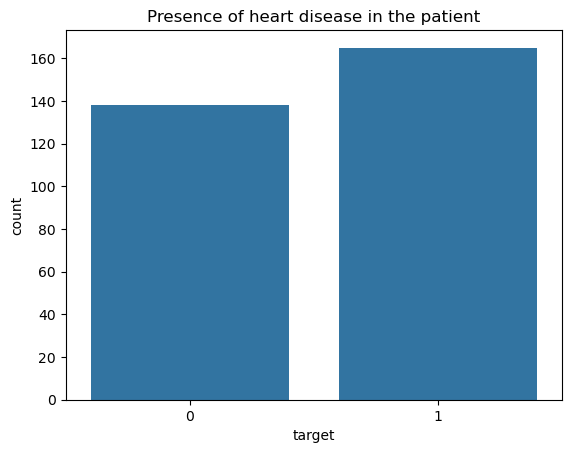

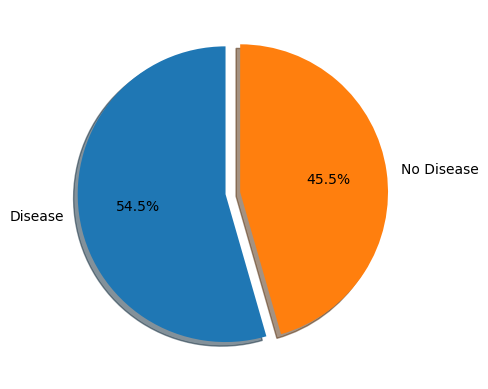

In [10]:
ax=sns.countplot(x=df['target'], data=df);
plt.title('Presence of heart disease in the patient')
plt.show()
#plt.title('Target column Distribution')
plt.pie(df['target'].value_counts(),labels = ['Disease', 'No Disease'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()


<div class="alert alert-block alert-warning">
<b>Observation:</b> 

Ensuring approximate balance within the dataset is crucial. A highly imbalanced dataset can invalidate the entire model training process, rendering it ineffective. For instance, if 99% of patients in the dataset have heart disease while only 1% do not, the model could achieve 99% accuracy simply by predicting that every new person has heart disease without actually learning or training anything which leads to overfitting (the model is memorizing the outcome).

<i>From the plot, it's obvious that the classes are almost balanced and we are good to proceed with data processing.</i>
    
</div>

<h2>Pair plot in dataset of target with all columns </h2>

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

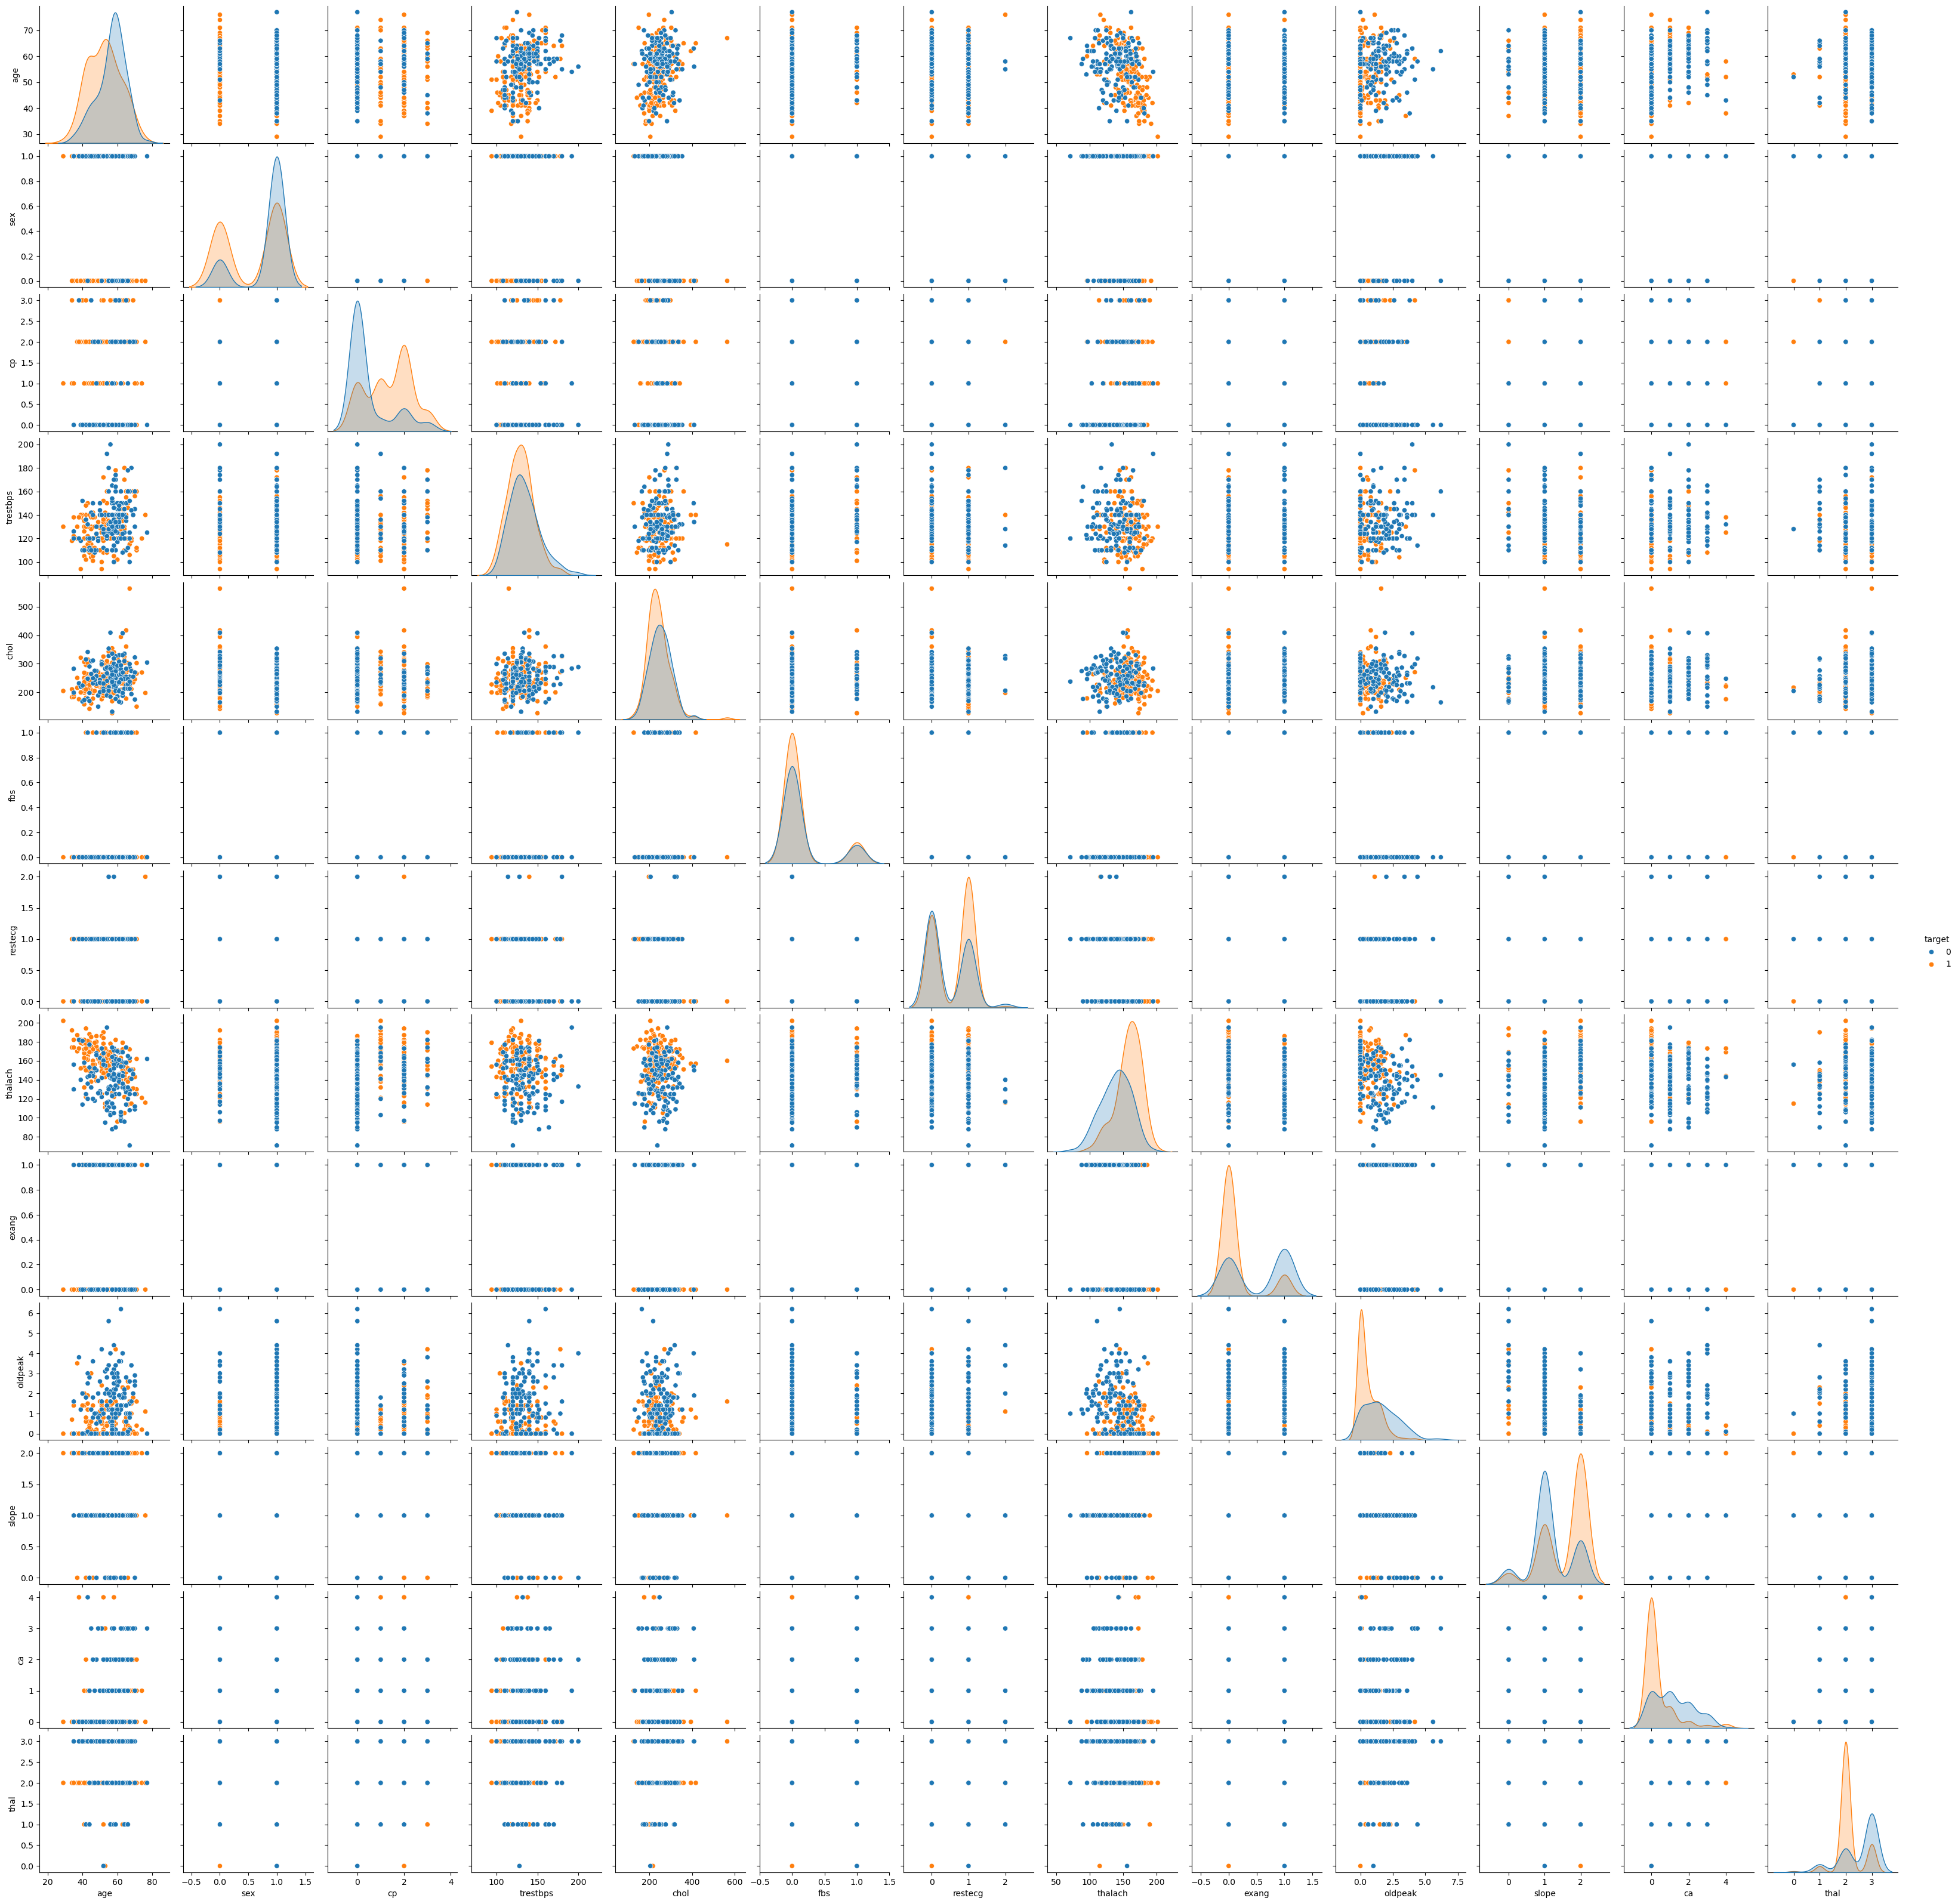

In [11]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='target')
plt.show()

<h2>A histogram to determine whether the attribute is considered numeric or categorical</h2>

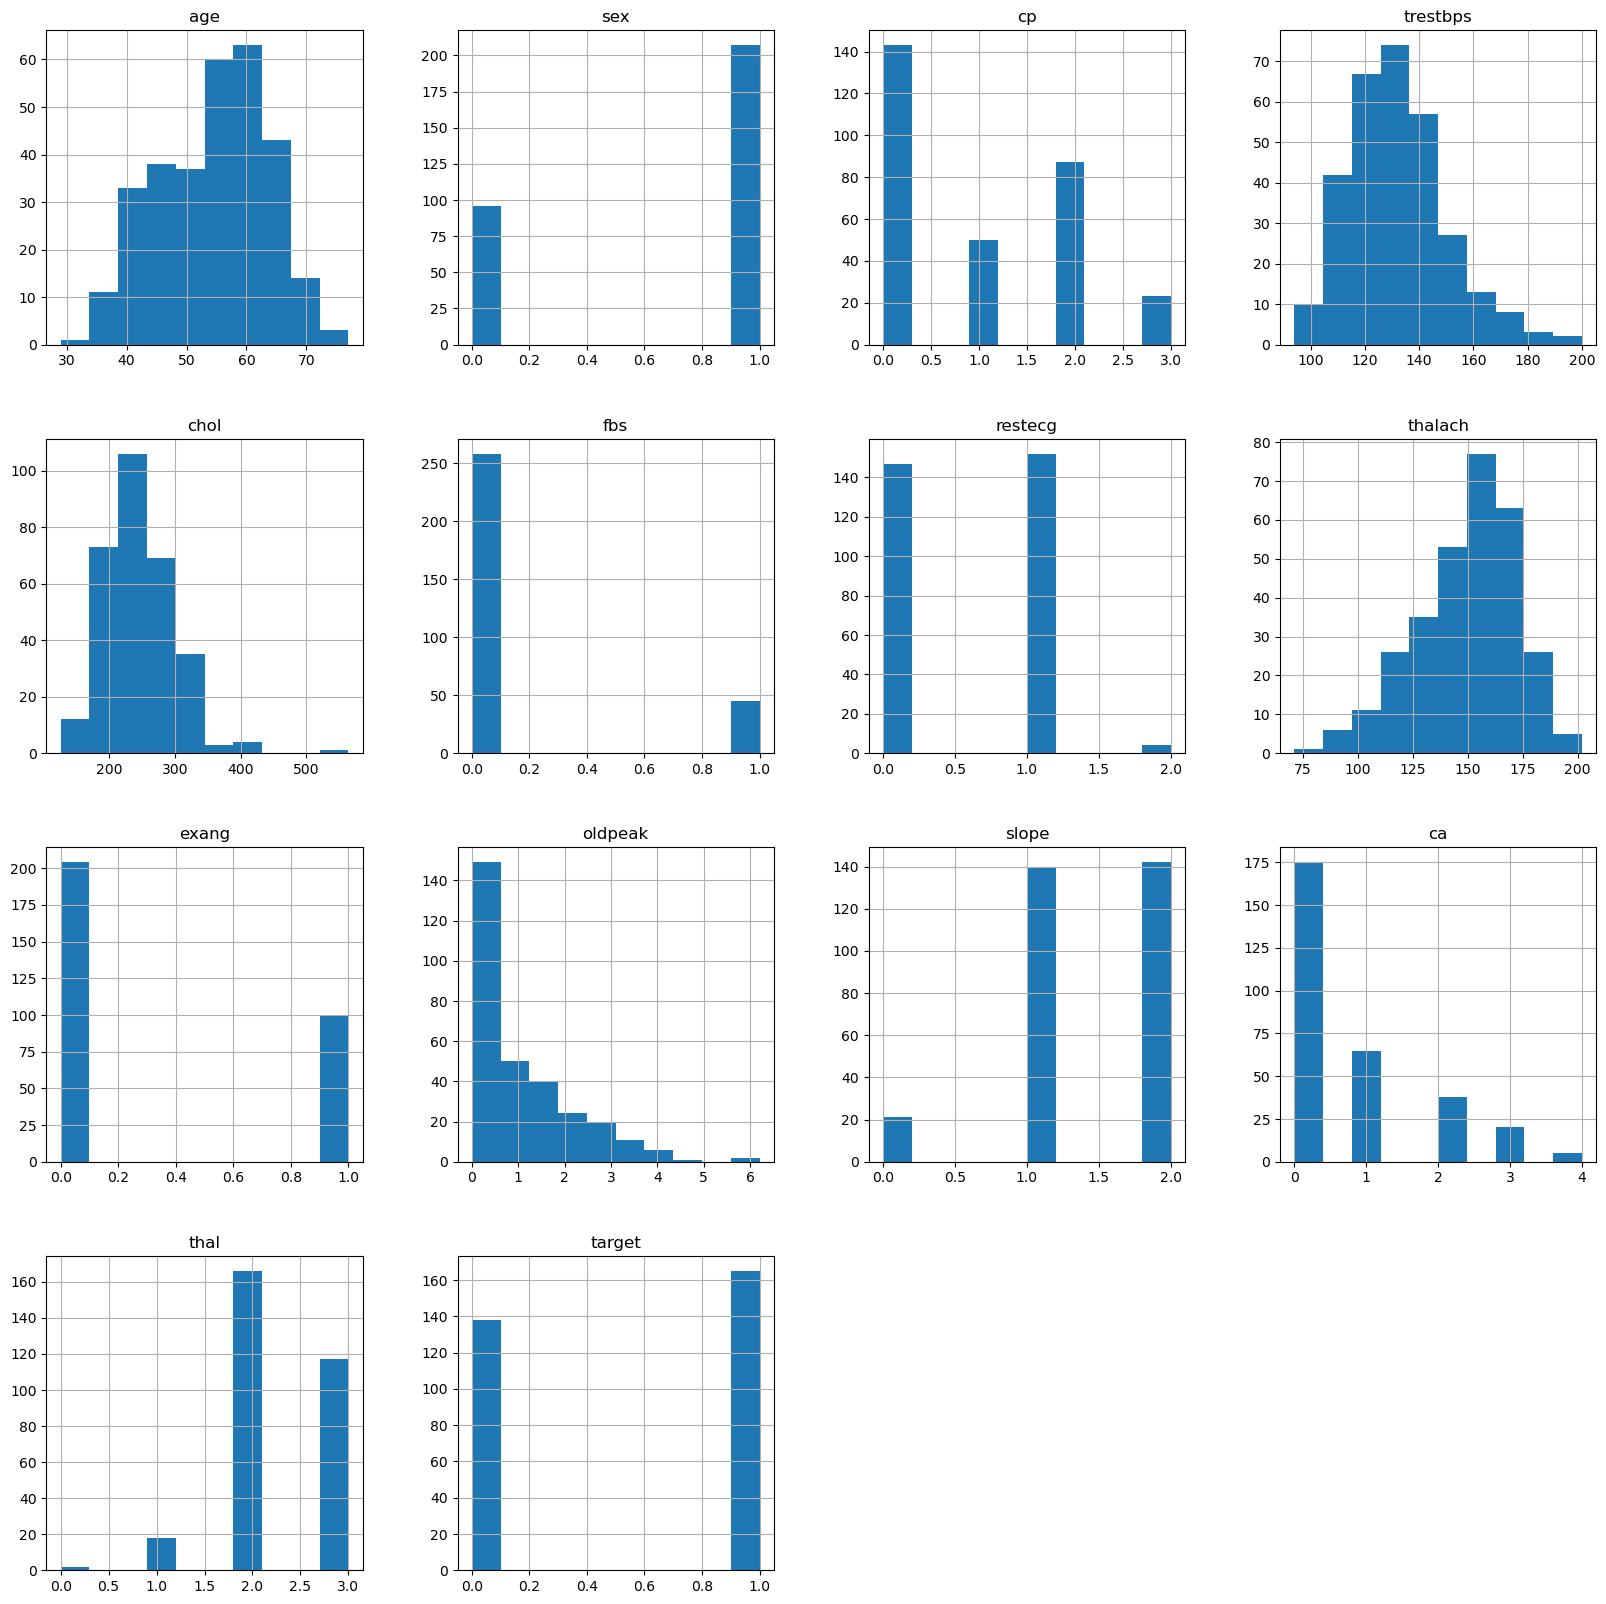

In [12]:
df.hist(figsize=(20, 20))  
plt.show()


<div class="alert alert-block alert-warning">
<b>Observation:</b> 

The plots show how each feature and label is distributed along different ranges, which further confirms the need for scaling. The discrete bars mean that each of these attributes is actually a categorical variable.
    
</div>

## <font color='Blue'>4. Data Visuzlization </font>  


**1) For Numerical data**
 - Made histograms to understand distributions (Univariate Analysis)
 - Corrplot
 - Pivot table comparing target across numeric variables (Bivariate Analysis)

**2) For Categorical Data**
 
 - Made bar charts to understand balance of classes to visualize the frequency of each category. (Univariate Analysis)
 - Made pivot tables to understand relationship with target (Bivariate Analysis)

In [13]:
# look at numeric (continous) and categorical values separately 
df_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_cat = ['sex','cp','fbs','restecg','exang','slope', 'ca','thal','target']

In [14]:
# Convert the identified features to object data type
df[df_cat] = df[df_cat].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

###  <font color='black'> 4.1 Analyzing Numerical Attributes</font>

</div>



In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<div class="alert alert-block alert-info">
 

<ul style="list-style-type: none; padding-left: 0;">
  <li><strong>age</strong>: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.</li>
  <li><strong>trestbps</strong>: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.</li>
  <li><strong>chol</strong>: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.</li>
  <li><strong>thalach</strong>: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.</li>
  <li><strong>oldpeak</strong>: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.</li>
</ul>
    
</div>


###  <font color='black'> 4.2 Analyzing Categorical Attributes</font>

</div>



In [16]:
df.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


<div class="alert alert-block alert-info">

<ul style="list-style-type: none; padding-left: 0;">
  <li><strong>sex</strong>: There are two unique values, with females (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.</li>
  <li><strong>cp</strong>: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.</li>
  <li><strong>fbs</strong>: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.</li>
  <li><strong>restecg</strong>: Three unique results are present. The most common result is "1", appearing 152 times.</li>
  <li><strong>exang</strong>: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 204 times.</li>
  <li><strong>slope</strong>: Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.</li>
  <li><strong>ca</strong>: There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.</li>
  <li><strong>thal</strong>: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 166 times.</li>
  <li><strong>target</strong>: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.</li>
</ul>
    
</div>

###  <font color='black'> 4.1.1 Numerical Attributes Analysis</font>

</div>



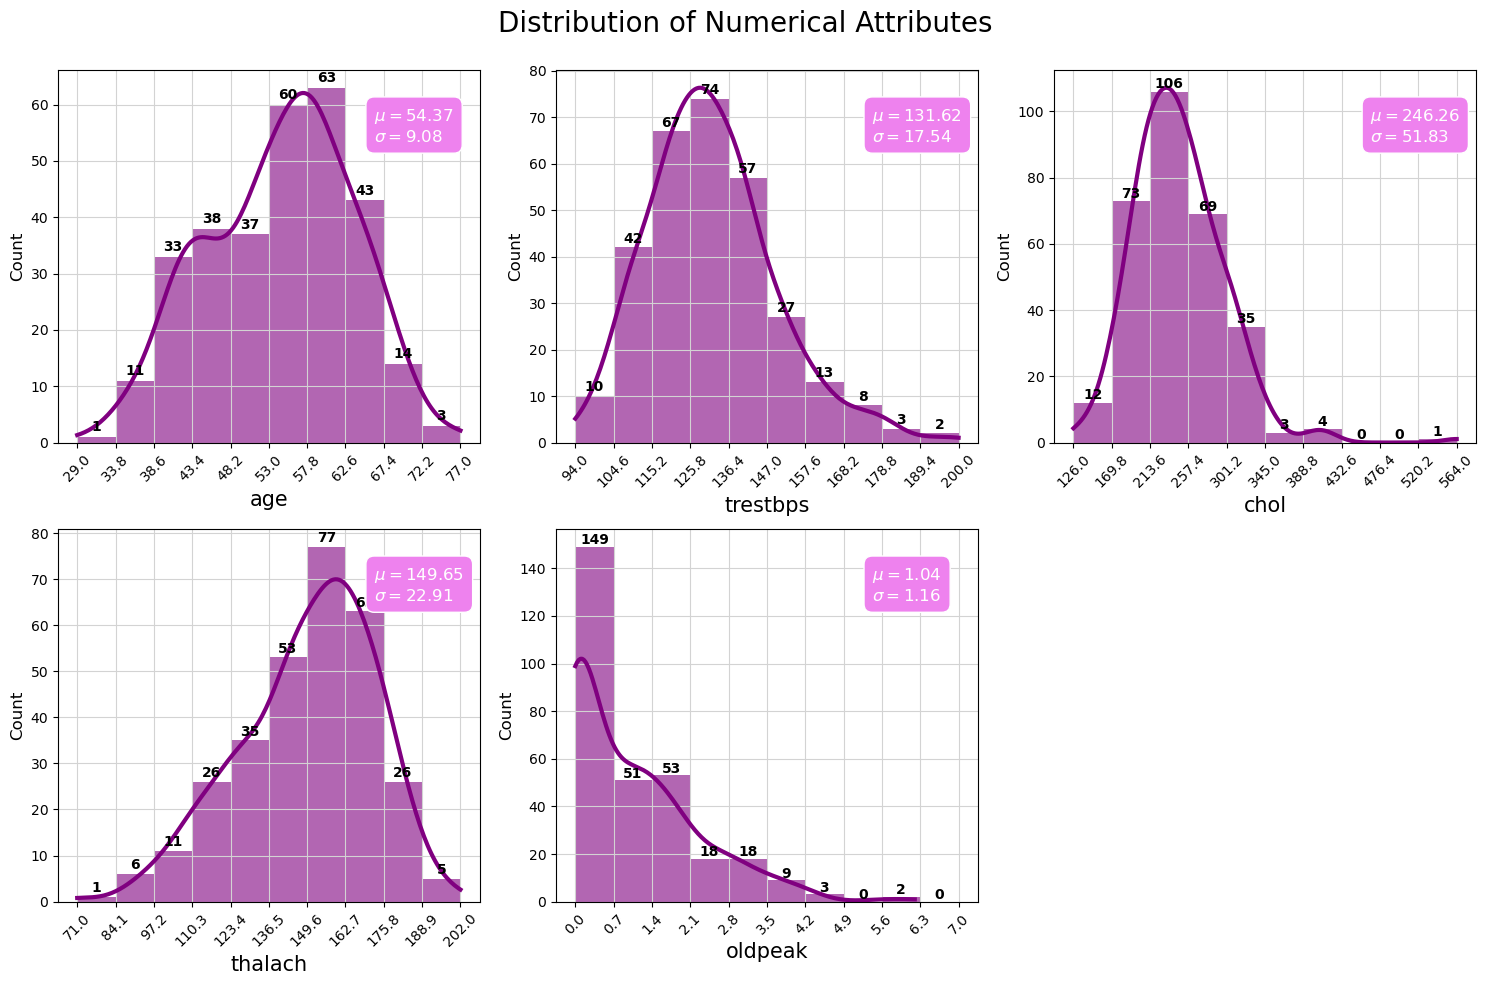

In [17]:
numerical = df[df_num]
# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(numerical.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(numerical[col], 
                                     range=(np.floor(numerical[col].min()), np.ceil(numerical[col].max())))
    
    # Plot histogram
    graph = sns.histplot(data=numerical, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='purple', alpha=0.6, line_kws={'lw': 3})
    
    # Set labels and ticks
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Annotate each bar with its count
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    # Add text annotations for mean and standard deviation
    textstr = '\n'.join((
        r'$\mu=%.2f$' % numerical[col].mean(),
        r'$\sigma=%.2f$' % numerical[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='violet', edgecolor='white', pad=0.5))

# Hide the last subplot (if it's not used)
ax[1, 2].axis('off')

# Set title and adjust layout
plt.suptitle('Distribution of Numerical Attributes', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)


<div class="alert alert-block alert-info">


<ul>
  <li>
    <strong>Age (age):</strong> The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 54.37 years with a standard deviation of 9.08 years.
  </li>
  <li>
    <strong>Resting Blood Pressure (trestbps):</strong> The distribution appears positively skewed, with most individuals having resting blood pressure concentrated around 120-140 mm Hg. The mean is approximately 131.62 mm Hg with a standard deviation of 17.54 mm Hg.
  </li>
  <li>
    <strong>Serum Cholesterol (chol):</strong> Most individuals have cholesterol levels between 200 and 300 mg/dl, indicating a positively skewed distribution. The mean cholesterol level is around 246.26 mg/dl with a standard deviation of 51.83 mg/dl.
  </li>
  <li>
    <strong>Maximum Heart Rate Achieved (thalach):</strong> The distribution appears negatively skewed, with the majority of individuals achieving a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 149.65 bpm with a standard deviation of 22.91 bpm.
  </li>
  <li>
    <strong>ST Depression Induced by Exercise (oldpeak):</strong> Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. This suggests a positively skewed distribution. The mean ST depression value is 1.04 with a standard deviation of 1.16.
  </li>
</ul>
<p>
  Upon reviewing the histograms of the numerical features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. There doesn't seem to be any noticeable noise among the numerical variables.
</p>

    
</div>

In [18]:
# compare target across numerical features
pd.pivot_table(df, index = 'target', values = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

,age,chol,oldpeak,thalach,trestbps
target,,,,,
0,56.601449,251.086957,1.585507,139.101449,134.398551
1,52.496970,242.230303,0.583030,158.466667,129.303030


###  <font color='black'> 4.2.1 Categorical Attributes Analysis</font>

</div>



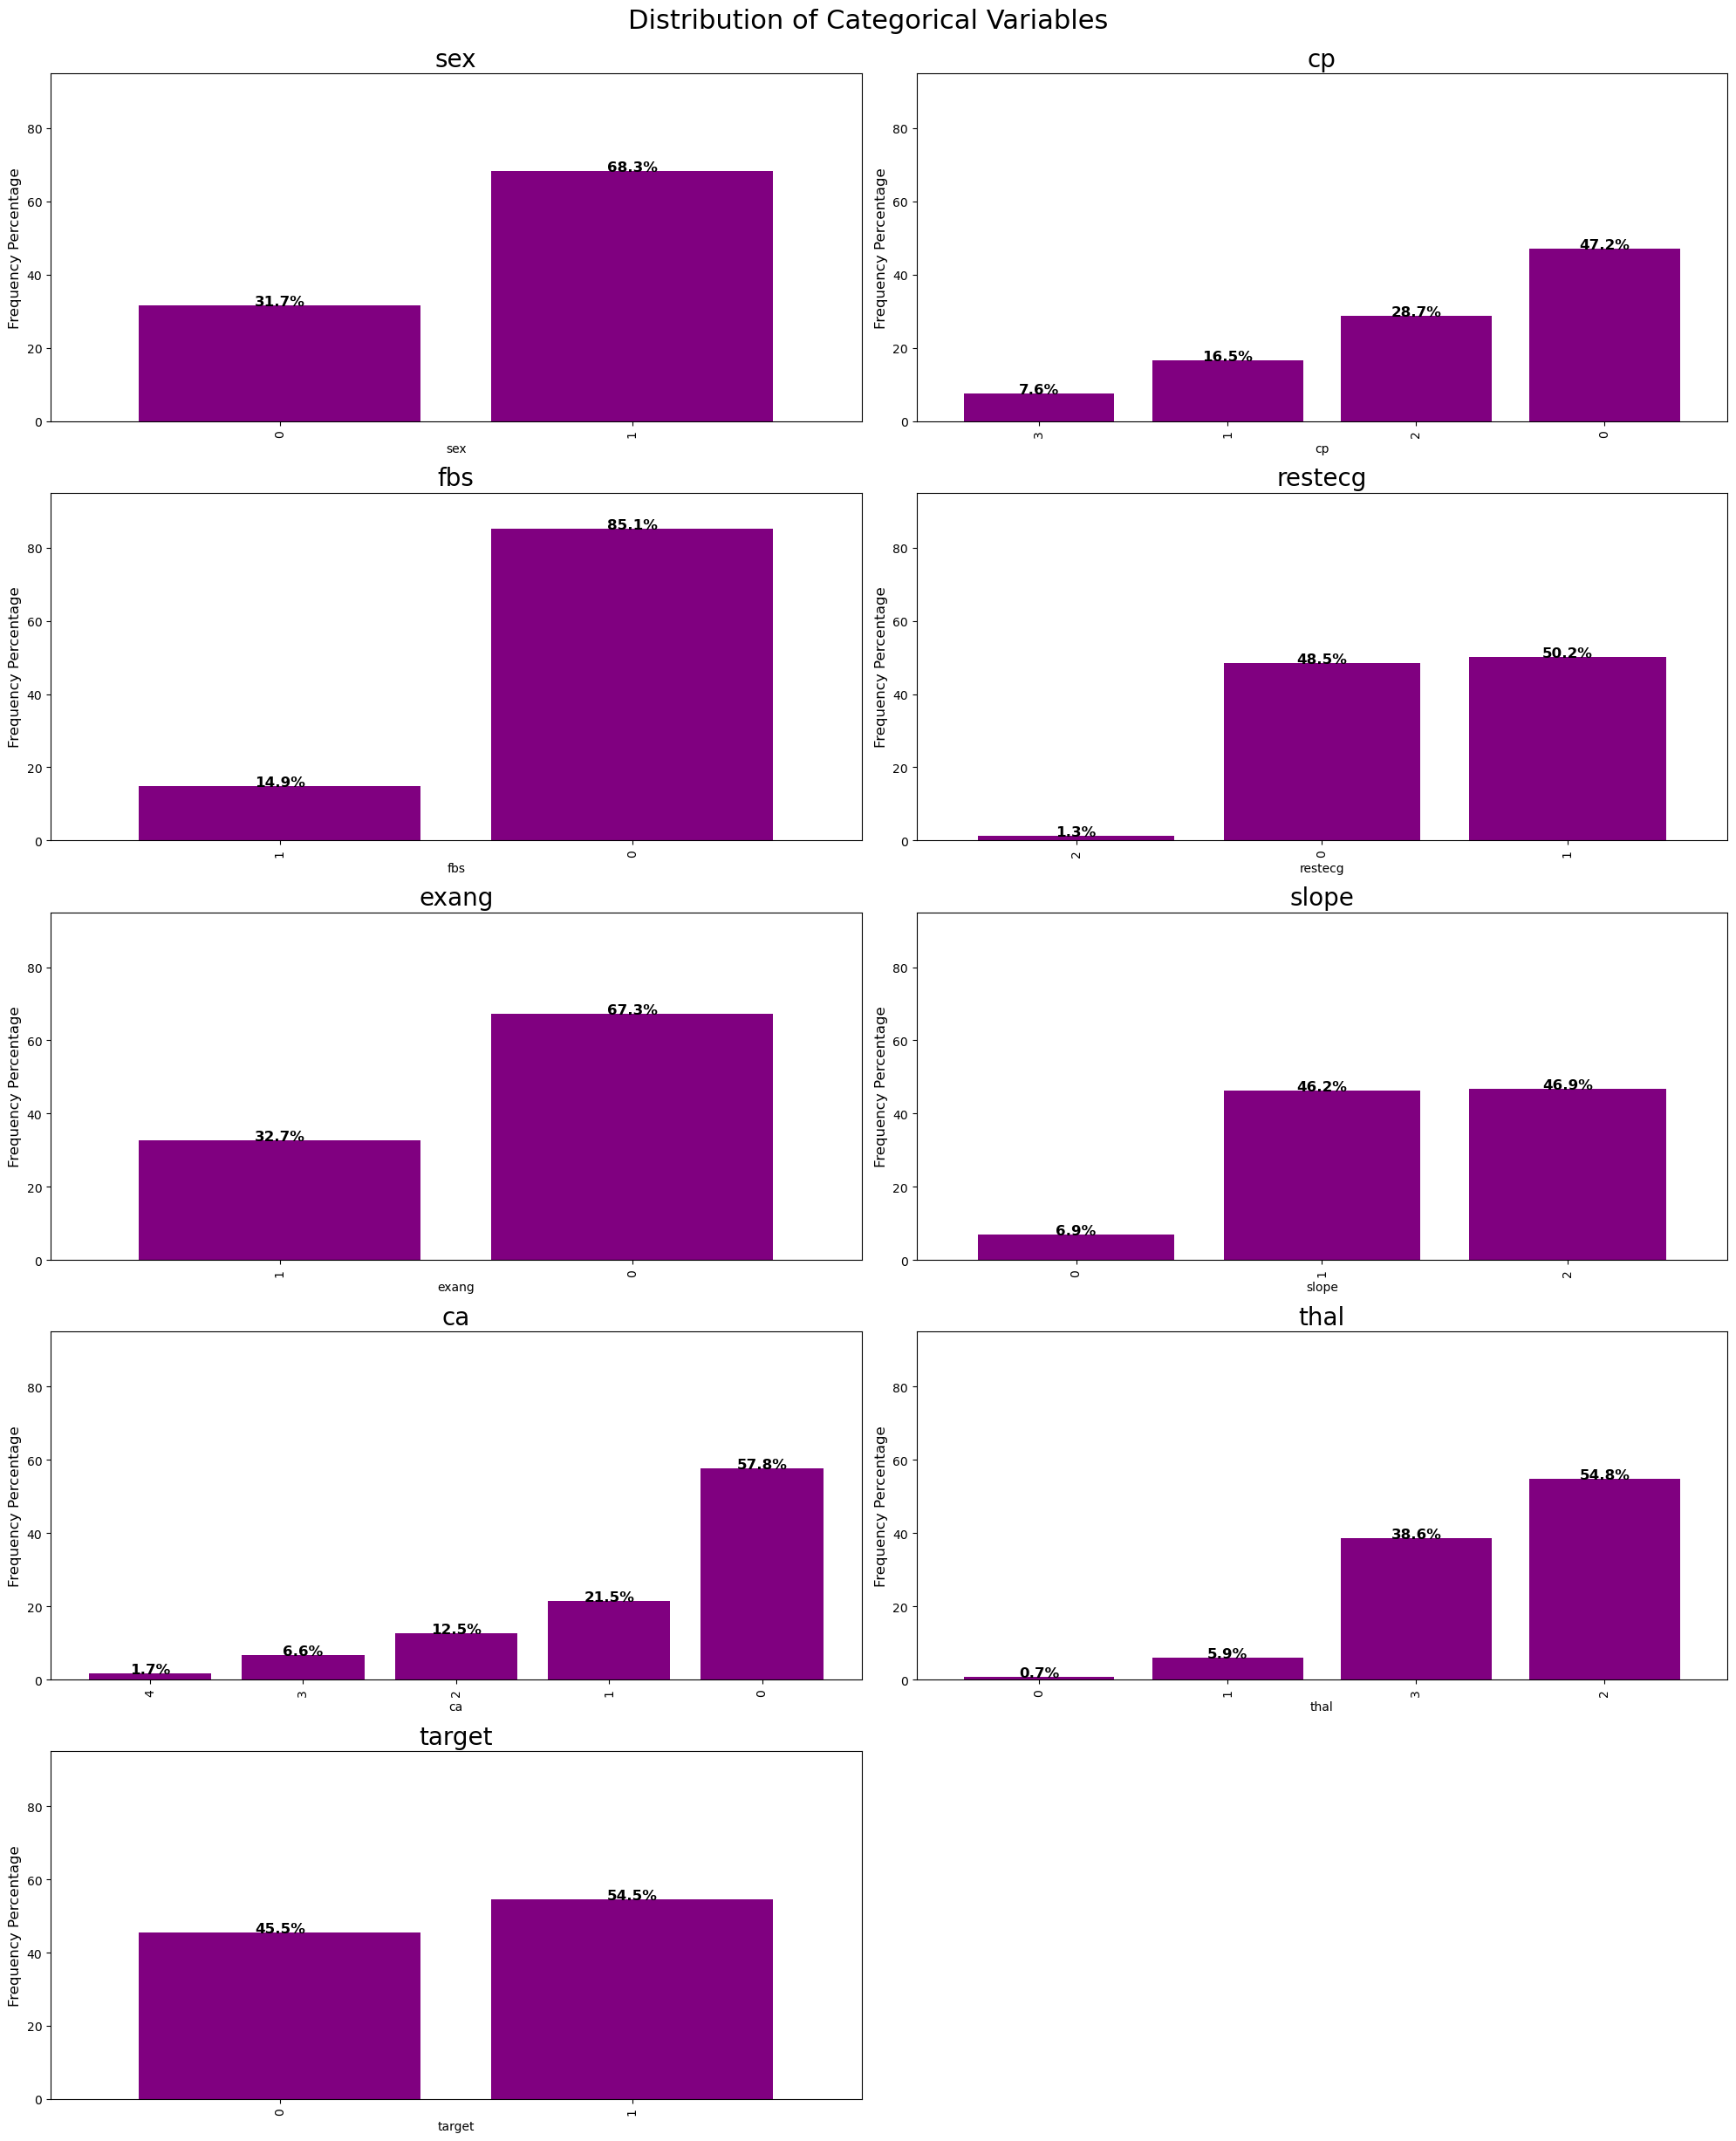

In [19]:
categorical = df[df_cat]
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(df_cat):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='bar', ax=ax[row, col_idx], width=0.8, color='purple')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(index, value, str(round(value, 1)) + '%', fontsize=12, weight='bold', ha='center')
    
    ax[row, col_idx].set_ylim([0, 95])
    ax[row, col_idx].set_ylabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Hide the last subplot (if it's not used)
ax[4, 1].axis('off')

# Set title and adjust layout
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<div class="alert alert-block alert-info">

<ul>
  <li>
    <strong>Gender (sex):</strong> The dataset predominantly comprises males, constituting a significant majority.
  </li>
  <li>
    <strong>Type of Chest Pain (cp):</strong> Various chest pain types are observed among patients. Type 0 (Typical angina) seems to be the most prevalent, but the exact distribution among types can be inferred from the bar plots.
  </li>
  <li>
    <strong>Fasting Blood Sugar (fbs):</strong> A large majority of patients have fasting blood sugar levels below 120 mg/dl, indicating that high blood sugar is uncommon in this dataset.
  </li>
  <li>
    <strong>Resting Electrocardiographic Results (restecg):</strong> The dataset exhibits a range of resting electrocardiographic outcomes, with some types being more prevalent than others. The precise distribution can be determined from the plots.
  </li>
  <li>
    <strong>Exercise-Induced Angina (exang):</strong> Most patients do not experience exercise-induced angina, suggesting that it may not be a common symptom in this dataset.
  </li>
  <li>
    <strong>Slope of the Peak Exercise ST Segment (slope):</strong> Various slopes of the peak exercise ST segment are observed in the dataset. One particular type may be more common, and its distribution can be inferred from the bar plots.
  </li>
  <li>
    <strong>Number of Major Vessels Colored by Fluoroscopy (ca):</strong> The majority of patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequently observed.
  </li>
  <li>
    <strong>Thalium Stress Test Result (thal):</strong> The dataset displays a diversity of thalium stress test results. While one specific type appears more prevalent, the exact distribution can be discerned from the plots.
  </li>
  <li>
    <strong>Presence of Heart Disease (target):</strong> The dataset shows nearly balanced representation regarding the presence of heart disease, with approximately 54.5% of individuals having it and 45.5% not having it.
  </li>
</ul>

</div>

In [20]:
# Comparing survival and each of these categorical variables 


# Create pivot tables for each categorical attribute
pivot_gender = pd.pivot_table(df, index='target', columns='sex', aggfunc='size', fill_value=0)
pivot_cp = pd.pivot_table(df, index='target', columns='cp', aggfunc='size', fill_value=0)
pivot_fbs = pd.pivot_table(df, index='target', columns='fbs', aggfunc='size', fill_value=0)
pivot_restecg = pd.pivot_table(df, index='target', columns='restecg', aggfunc='size', fill_value=0)
pivot_exang = pd.pivot_table(df, index='target', columns='exang', aggfunc='size', fill_value=0)
pivot_slope = pd.pivot_table(df, index='target', columns='slope', aggfunc='size', fill_value=0)
pivot_ca = pd.pivot_table(df, index='target', columns='ca', aggfunc='size', fill_value=0)
pivot_thal = pd.pivot_table(df, index='target', columns='thal', aggfunc='size', fill_value=0)

# Apply styling to the pivot tables
styled_pivot_gender = pivot_gender.style.set_caption("Pivot Table for Gender (sex)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_cp = pivot_cp.style.set_caption("Pivot Table for Type of Chest Pain (cp)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_fbs = pivot_fbs.style.set_caption("Pivot Table for Fasting Blood Sugar (fbs)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_restecg = pivot_restecg.style.set_caption("Pivot Table for Resting Electrocardiographic Results (restecg)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_exang = pivot_exang.style.set_caption("Pivot Table for Exercise-Induced Angina (exang)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_slope = pivot_slope.style.set_caption("Pivot Table for Slope of the Peak Exercise ST Segment (slope)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_ca = pivot_ca.style.set_caption("Pivot Table for Number of Major Vessels Colored by Fluoroscopy (ca)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

styled_pivot_thal = pivot_thal.style.set_caption("Pivot Table for Thalium Stress Test Result (thal)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('font-size', '18px'),
        ('font-weight', 'bold'),
        ('color', 'blue')
    ]
}])

# Display the styled pivot tables
display(styled_pivot_gender)
display(styled_pivot_cp)
display(styled_pivot_fbs)
display(styled_pivot_restecg)
display(styled_pivot_exang)
display(styled_pivot_slope)
display(styled_pivot_ca)
display(styled_pivot_thal)


sex,0,1
target,,
0,24,114
1,72,93


cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


fbs,0,1
target,,
0,116,22
1,142,23


restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


exang,0,1
target,,
0,62,76
1,142,23


slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


<div class="alert alert-block alert-info">
    <ul>
        <li><strong>Gender Hypothesis:</strong> Males may have a higher likelihood of heart disease compared to females.</li>
        <li><strong>Type of Chest Pain Hypothesis:</strong> Certain chest pain types, particularly types 2 and 3, may be associated with a higher risk of heart disease.</li>
        <li><strong>Fasting Blood Sugar Hypothesis:</strong> Elevated fasting blood sugar levels may indicate an increased risk of heart disease.</li>
        <li><strong>Resting Electrocardiographic Results Hypothesis:</strong> Specific electrocardiographic abnormalities, particularly type 1, may be linked to a higher risk of heart disease.</li>
        <li><strong>Exercise-Induced Angina Hypothesis:</strong> The absence of exercise-induced angina (exang = 0) may be associated with a lower risk of heart disease.</li>
        <li><strong>Slope of the Peak Exercise ST Segment Hypothesis:</strong> Certain slope types, particularly type 2, may indicate an increased risk of heart disease.</li>
        <li><strong>Number of Major Vessels Colored by Fluoroscopy Hypothesis:</strong> A higher number of vessels colored by fluoroscopy (ca > 0) may suggest a higher risk of heart disease.</li>
        <li><strong>Thalium Stress Test Result Hypothesis:</strong> Certain thalium stress test results, particularly type 2, may be associated with an increased risk of heart disease.</li>
    </ul>
</div>


In [21]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:

#normalized_df = (df - df.min()) / (df.max() - df.min())



In [23]:
#normalized_df.head()

## <font color='Blue'>5. Data Cleaning</font>  

<h3> Outlier Detection Using IQR Method for Numerical Features</h3>



<div class="alert alert-block alert-warning">
<b>Observation:</b> 

Outlier detection and treatment methods, such as calculating z-scores or interquartile range (IQR), are based on the distribution of numerical data. These methods rely on measures of central tendency and dispersion, which are not meaningful for categorical variables.

    
</div>

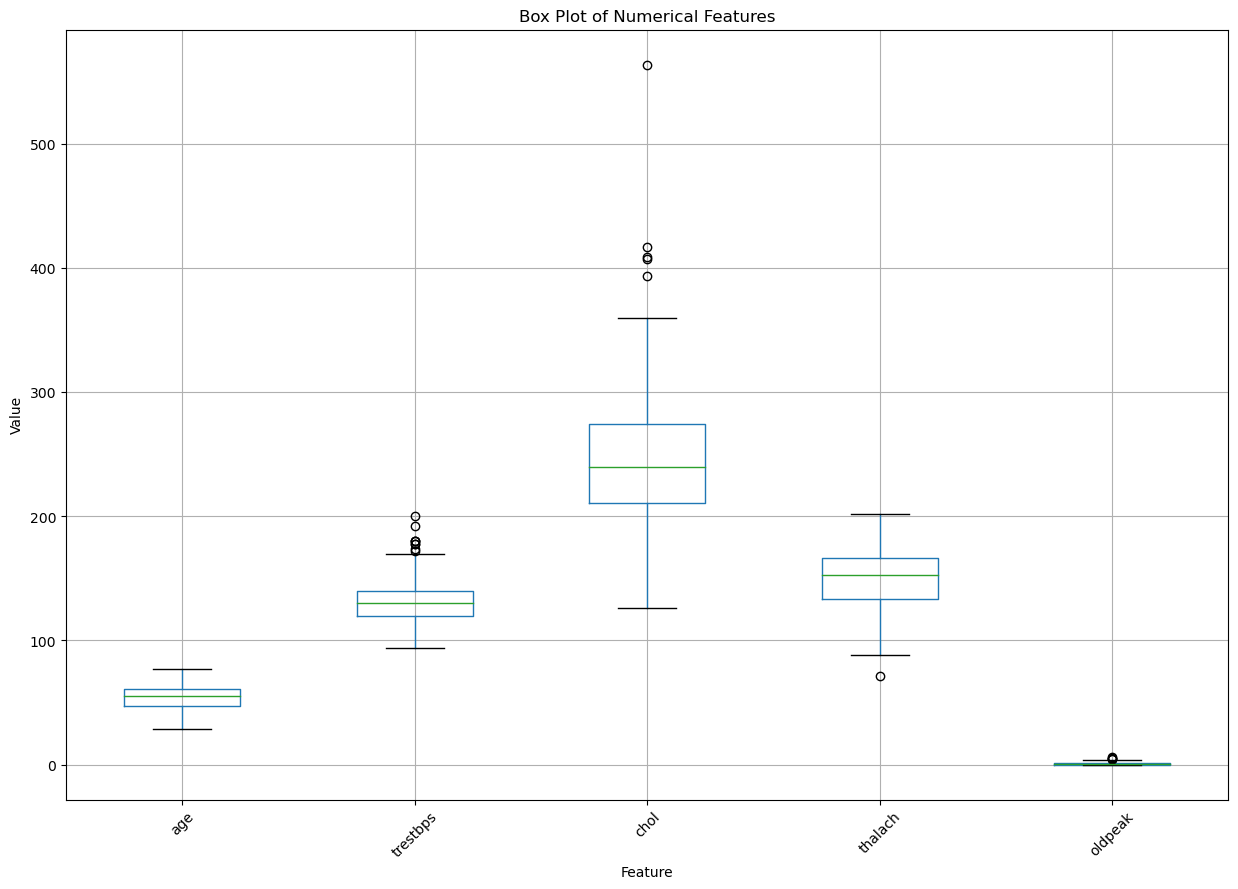

In [24]:
numerical.boxplot(figsize=(15, 10))
plt.title('Box Plot of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)  
plt.show()

In [25]:
Q1 = df[df_num].quantile(0.25)
Q3 = df[df_num].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[df_num] < (Q1 - 1.5 * IQR)) | (df[df_num] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


<div class="alert alert-block alert-warning">
<b>Observation:</b> 

* __`age`__: No outliers
* __`trestbps`__: 9 outliers
* __`chol`__: 5 outliers
* __`thalach`__: 1 outlier
* __`oldpeak`__: 5 outliers


    
</div>

<h3> Outlier Treatment Using Clipping</h3>


In [26]:

outliers_features = ['age','trestbps','chol','thalach','oldpeak']
for i in outliers_features:
    #Finding upper and lower limt for features in train set
    Inter_Quartile_Range = df[i].quantile(0.75) - df[i].quantile(0.25)

    lower_boundary = df[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df[i]= np.where(df[i] > upper_boundary, upper_boundary,np.where(df[i] < lower_boundary, lower_boundary,df[i]))

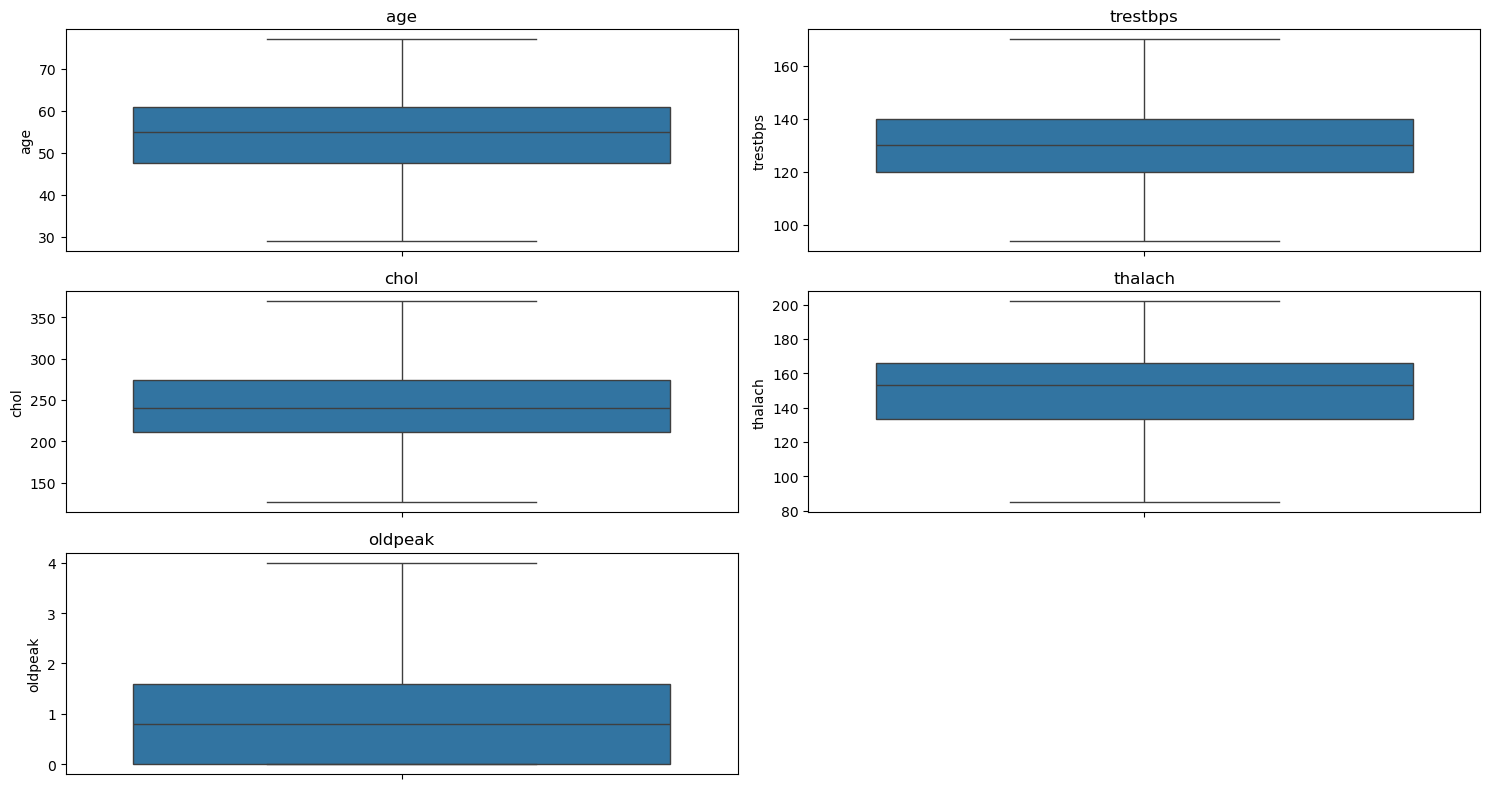

In [27]:

num_features = len(outliers_features)
num_cols = 2  # Number of columns (features to display per row)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(15, 8))

for index, feature in enumerate(outliers_features, start=1):
    plt.subplot(num_rows, num_cols, index)
    sns.boxplot(y=df[feature])
    plt.title(feature)


plt.tight_layout()


plt.show()


 
<div class="alert alert-block alert-warning">
<b>Observation:</b> 

We could've used the standard scaler method to scale down the data so that it won’t raise the outliers.
    
</div>

In [28]:
df.drop(df[df['restecg'] == 2].index, inplace=True)


In [29]:
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

# Create new columns based on age bins
for label in labels:
    df[label] = pd.cut(df['age'], bins=bins, labels=False) == labels.index(label)
    
df= df.astype(int)

In [30]:
df.drop('age', axis=1, inplace=True)


In [31]:
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,30-39,40-49,50-59,60-69,70-79
0,1,3,145,233,1,0,150,0,2,0,0,1,1,0,0,0,1,0
1,1,2,130,250,0,1,187,0,3,0,0,2,1,1,0,0,0,0
2,0,1,130,204,0,0,172,0,1,2,0,2,1,0,1,0,0,0
3,1,1,120,236,0,1,178,0,0,2,0,2,1,0,0,1,0,0
4,0,0,120,354,0,1,163,1,0,2,0,2,1,0,0,1,0,0


<h3>Categorical Features Handling (Normalization)</h3>



After exploring the dataset, we observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [32]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [33]:
dataset = dataset.astype(int)

<h3>Feature Scaling (Standardization)</h3>


In [34]:
dataset.head()

,trestbps,chol,thalach,oldpeak,target,30-39,40-49,50-59,60-69,70-79,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,145,233,150,2,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,130,250,187,3,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,130,204,172,1,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,120,236,178,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,120,354,163,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [35]:
dataset.columns

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'target', '30-39', '40-49',
       '50-59', '60-69', '70-79', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

<div class="alert alert-block alert-info">
    <b>Feature Scaling</b> is a crucial preprocessing step for algorithms that are sensitive to the magnitude or scale of features. Models like <b>SVM</b>,<b>KNN</b>, and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. <b>Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.</b>
    </div>

In [36]:
dataset.head()

,trestbps,chol,thalach,oldpeak,target,30-39,40-49,50-59,60-69,70-79,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,145,233,150,2,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,130,250,187,3,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,130,204,172,1,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,120,236,178,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,120,354,163,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [37]:
standScaler = StandardScaler()
columns_to_scale = [ 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])


In [38]:
dataset.head()

,trestbps,chol,thalach,oldpeak,target,30-39,40-49,50-59,60-69,70-79,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.838212,-0.252131,-0.000442,1.255862,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.072270,0.108066,1.630683,2.246635,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.072270,-0.866587,0.969416,0.265090,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,-0.679258,-0.188567,1.233922,-0.725683,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-0.679258,2.311630,0.572656,-0.725683,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [39]:
any_negative = (dataset < 0).any()

# Print features with negative values
print("Features with negative values:")
print(any_negative[any_negative].index.tolist())

Features with negative values:
['trestbps', 'chol', 'thalach', 'oldpeak']


In [40]:

features_to_adjust = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Select only the specified features
subset = dataset[features_to_adjust]

# Find the least negative value in each selected feature
least_negatives = subset.min()

# Add the absolute value of the least negative value to all values in each selected feature
dataset[features_to_adjust] += abs(least_negatives)

# Check if any selected feature has negative values after adjustment
any_negative = (dataset[features_to_adjust] < 0).any()

# Print selected features with negative values after adjustment
print("Features with negative values after adjustment:")
print(any_negative[any_negative].index.tolist())


Features with negative values after adjustment:
[]


In [41]:
dataset.head()

,trestbps,chol,thalach,oldpeak,target,30-39,40-49,50-59,60-69,70-79,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,3.095640,2.267128,2.909574,1.981545,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,2.185158,2.627326,4.540699,2.972318,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2.185158,1.652673,3.879432,0.990773,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,1.578169,2.330692,4.143939,0.000000,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,1.578169,4.830890,3.482672,0.000000,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


<div style="color: blue;" class="alert alert-block">
<b>Observation:</b> 
    Standardization (Z-score) would generally be a better choice since most of the numerical features are not normally distributed. We might even use standardization for age and thalach, as they are more normally distributed, and normalization for trestbps, chol, and oldpeak because their data is notably skewed. This depends on the output of the classifiers.
</div>


<h1 style="color: blue;">Phase 2</h1>


<h3>Splitting the Data into Train and Test</h3>


In [42]:
all_features = dataset.drop(columns=['target'])  # Features
Targeted_feature= dataset['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(all_features, Targeted_feature, test_size=0.2, random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (239, 33)
X_test shape: (60, 33)
y_train shape: (239,)
y_test shape: (60,)


<h2 style="color: purple">Classification Models</h2>


In [44]:

def roc_auc(model,all_features,Targeted_feature):
    
    # ROC Curve and AUC Score
    y_scores = cross_val_predict(model, all_features, Targeted_feature, cv=10)
    fpr, tpr, thresholds = roc_curve(Targeted_feature, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC/AUC Curve')
    plt.show()
    
    auc_score = roc_auc_score(Targeted_feature, y_scores)
    print(f'AUC Score: {auc_score}')
    
def prc(Targeted_feature,y_scores):
    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(Targeted_feature, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

 
<div class="alert alert-block alert-warning">

 <h1>Explanation of ROC/AUC Curve</h1>
    <p>The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are commonly used evaluation metrics for binary classification models. Here's an explanation of what they represent:</p>
    <ol>
        <li>
            <strong>ROC Curve:</strong>
            <ul>
                <li>The ROC curve is a graphical representation of the performance of a binary classification model across different threshold values.</li>
                <li>It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for various threshold settings.</li>
                <li>TPR, also known as sensitivity or recall, is the proportion of positive instances that are correctly classified as positive.</li>
                <li>FPR is the proportion of negative instances that are incorrectly classified as positive.</li>
                <li>By plotting TPR against FPR at different threshold settings, the ROC curve provides insights into the trade-offs between true positive rate and false positive rate as the classification threshold varies.</li>
            </ul>
        </li>
        <li>
            <strong>AUC (Area Under the Curve):</strong>
            <ul>
                <li>The AUC is a scalar value that represents the area under the ROC curve.</li>
                <li>AUC ranges from 0 to 1.</li>
                <li>AUC = 1 represents a perfect classifier that achieves a TPR of 1 (100% sensitivity) and an FPR of 0 (0% false positive rate).</li>
                <li>AUC = 0.5 represents a random classifier that performs no better than random guessing.</li>
                <li>AUC < 0.5 represents a classifier that performs worse than random guessing.</li>
                <li>The higher the AUC, the better the model's ability to distinguish between positive and negative instances across all possible thresholds.</li>
            </ul>
        </li>
        <li>
            <strong>Interpretation:</strong>
            <ul>
                <li>AUC provides a single scalar value summarizing the model's performance, making it easy to compare models.</li>
                <li>It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.</li>
                <li>A higher AUC indicates better discrimination ability of the model, i.e., the model is better at distinguishing between the positive and negative classes.</li>
            </ul>
        </li>
    </ol>
</div>
    
</div>

 
<div class="alert alert-block alert-warning">
<b>Observation:</b> 
The Precision-Recall (PR) curve is a valuable metric for binary classification models, especially in imbalanced datasets. It evaluates model performance by considering precision (correctly predicted positives among all predicted positives) and recall (correctly predicted positives among all actual positives). The curve plots precision against recall, showcasing how well the model balances these metrics at different threshold levels.</div>

## <font color='Blue'>1. K Nearest Neighbors Classifier</font>   

Text(0, 0.5, 'Accuracy Score')

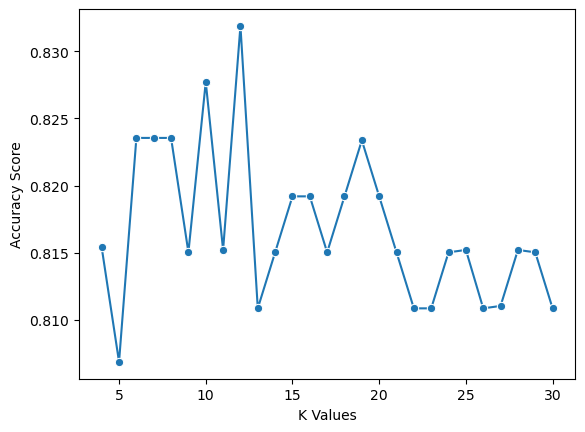

In [45]:
k_values = [i for i in range (4,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

 
<div class="alert alert-block alert-warning">
<b>Observation:</b> 
The optimal value for K is 12, as it achieves the highest accuracy in our model.    
</div>

In [105]:
modelKNN = KNeighborsClassifier(n_neighbors=12)
modelKNN.fit(X_train, y_train)

# Prediction
prediction_knn = modelKNN.predict(X_test)

# Accuracy
accuracy = accuracy_score(prediction_knn, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearest Neighbors Classifier is', round(accuracy * 100, 2))

# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_knn = cross_val_score(modelKNN, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score for K Nearest Neighbors Classifier is:', round(result_knn.mean() * 100, 2))

# Cross-validated prediction
y_predKNN = cross_val_predict(modelKNN, all_features, Targeted_feature, cv=10)


--------------The Accuracy of the model----------------------------
The accuracy of the K Nearest Neighbors Classifier is 85.0
The cross-validated score for K Nearest Neighbors Classifier is: 82.95


 
<div class="alert alert-block alert-warning">
<b>Observation:</b> 

<ol>
  <li>The dataset is divided into 10 equal-sized folds.</li>
  <li>The model is trained and tested 10 times, with each fold used once as the test set and the remaining folds as the training set.</li>
  <li>Performance metrics are averaged across the 10 iterations, providing a robust estimate of the model's performance.</li>
  <li>It helps in evaluating the model's performance, mitigating overfitting, and selecting optimal hyperparameters.</li>
</ol>
    
</div>

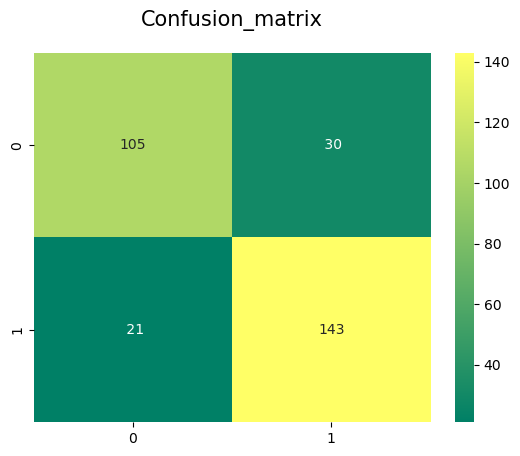

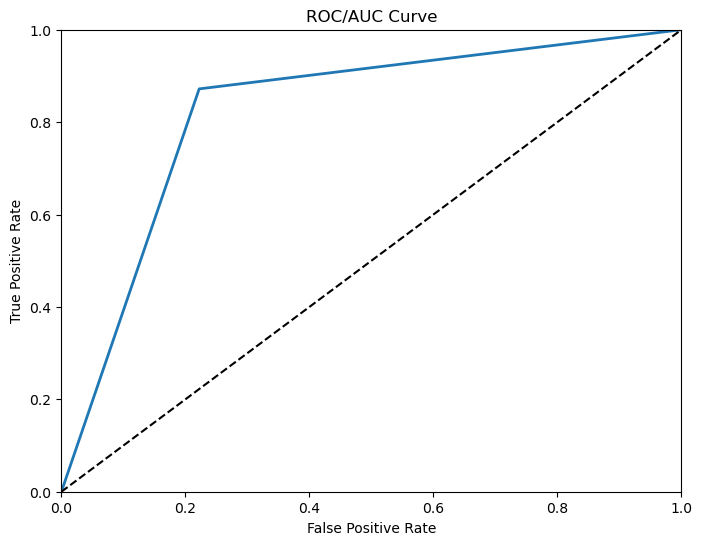

AUC Score: 0.8248644986449865


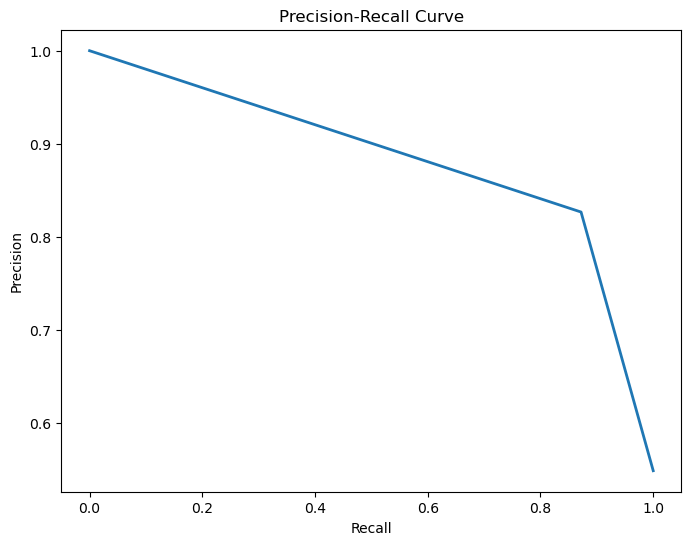

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       135
           1       0.83      0.87      0.85       164

    accuracy                           0.83       299
   macro avg       0.83      0.82      0.83       299
weighted avg       0.83      0.83      0.83       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       111
           1       0.86      0.89      0.87       128

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        36

    accuracy                           0.85        60
   mac

In [47]:
# Confusion Matrix
sns.heatmap(confusion_matrix(Targeted_feature, y_predKNN), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(modelKNN, all_features, Targeted_feature)

# Precision-Recall Curve
prc(Targeted_feature, y_predKNN)

# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_predKNN))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, modelKNN.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, modelKNN.predict(X_test)))


## <font color='Blue'>2.Gaussian Naive Bayes Classifier</font>   

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 78.33
The cross validated score for Gaussian Naive Bayes classifier is: 78.93


Text(0.5, 1.05, 'Confusion_matrix')

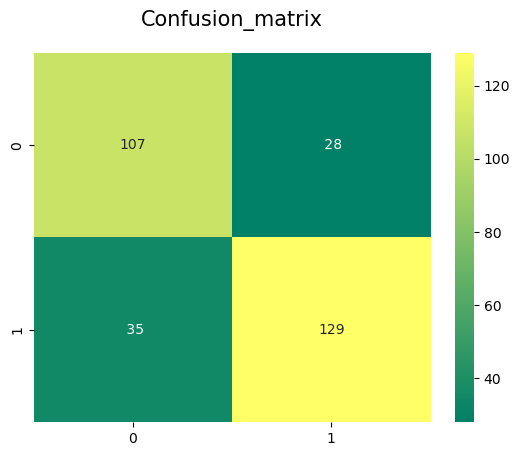

In [92]:

nb= GaussianNB()
nb.fit(X_train,y_train)
prediction_bayes = nb.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_bayes,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(nb,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_prednb = cross_val_predict(nb,all_features,Targeted_feature,cv=10)

sns.heatmap(confusion_matrix(Targeted_feature,y_prednb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## <font color='Blue'>Naive Bayes Hyperparameter Tuning</font>   

In [93]:
# Gaussian Naive Bayes

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

#making a grid of 10 folds, each with 100 cells

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1,cv=10, n_jobs=-1)

grid_result_nb = grid_search_nb.fit(X_train, y_train)

prediction_bayes=grid_result_nb.predict(X_test)





print('Best parameters from Grid Search on subset: {}'.format(grid_search_nb.best_params_))
print('Best score: {}'.format(grid_search_nb.best_score_))



print("Accuracy:",accuracy_score(y_test, prediction_bayes))




# Recall = TP/TP+FN
# precision = TP /TP +FP
# Accuracy = TP+TN / Total

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from Grid Search on subset: {'var_smoothing': 0.12328467394420659}
Best score: 0.840036231884058
Accuracy: 0.8666666666666667


In [94]:

nb= GaussianNB(var_smoothing= 0.12328467394420659)
nb.fit(X_train,y_train)
prediction_bayes = nb.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_bayes,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(nb,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_prednb = cross_val_predict(nb,all_features,Targeted_feature,cv=10)


--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 86.67
The cross validated score for Gaussian Naive Bayes classifier is: 84.26


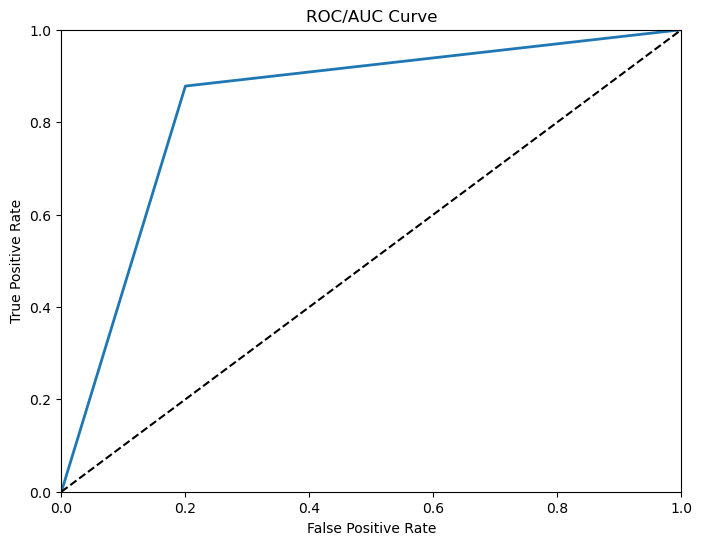

AUC Score: 0.8390243902439024


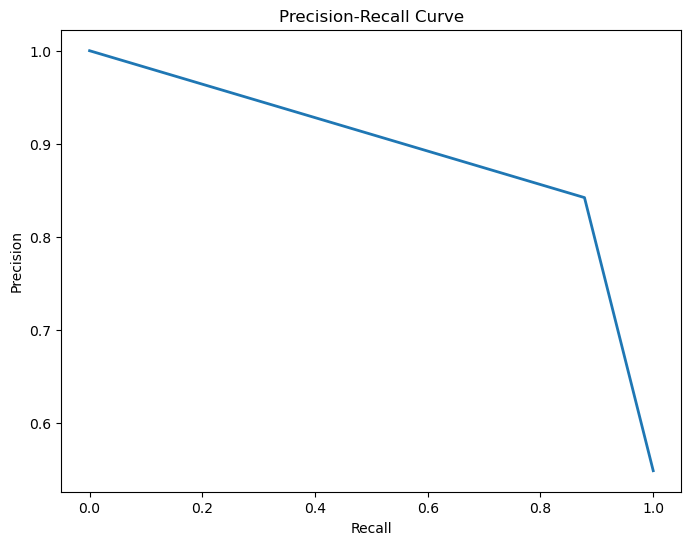

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       135
           1       0.84      0.88      0.86       164

    accuracy                           0.84       299
   macro avg       0.84      0.84      0.84       299
weighted avg       0.84      0.84      0.84       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       111
           1       0.84      0.88      0.86       128

    accuracy                           0.85       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.85      0.84       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.85      0.94      0.89        36

    accuracy                           0.87        60
   mac

In [95]:
# ROC/AUC Curve Matrix
roc_auc(nb,all_features,Targeted_feature)

# precision_recall_curve
prc(Targeted_feature,y_prednb)

# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_prednb))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, nb.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, nb.predict(X_test)))


## <font color='Blue'>3.Decision Trees</font>   

In [51]:
#Random Values
model_dt = DecisionTreeClassifier(max_depth=6, random_state=0 ,criterion='entropy' , min_samples_split=2)
model_dt.fit(X_train,y_train)

prediction_tree = model_dt.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Descision Tree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_dt=cross_val_score(model_dt,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Descision Tree classifier is:',round(result_dt.mean()*100,2))
y_pred_dt = cross_val_predict(model_dt,all_features,Targeted_feature,cv=10)

--------------The Accuracy of the model----------------------------
The accuracy of the Descision Tree Classifier is 81.67
The cross validated score for Descision Tree classifier is: 72.87


## <font color='Blue'>Decision Trees Hyperparameter Tuning</font>   

In [55]:

param_grid_dt ={
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None],
}

#making a grid of 10 folds, each with 100 cells
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, verbose=3,cv=10, refit = True, n_jobs=-1 , scoring='accuracy')
grid_result_dt = grid_search_dt.fit(X_train, y_train)
prediction_DT=grid_result_dt.predict(X_test)

y_pred_test = grid_search_dt.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Best parameters from Grid Search on subset: {}'.format(grid_search_dt.best_params_))
print('Best score: {}'.format(grid_search_dt.best_score_))


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuracy score for test data is: 0.8333333333333334
Best parameters from Grid Search on subset: {'criterion': 'entropy', 'max_depth': 3}
Best score: 0.7731884057971014


In [56]:

model_dt = DecisionTreeClassifier(max_depth=3, random_state=0 ,criterion='entropy' , min_samples_split=2)
model_dt.fit(X_train,y_train)
prediction_tree = model_dt.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Descision Tree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts

result_dt=cross_val_score(model_dt,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Descision Tree classifier is:',round(result_dt.mean()*100,2))

y_pred_dt = cross_val_predict(model_dt,all_features,Targeted_feature,cv=10)

--------------The Accuracy of the model----------------------------
The accuracy of the Descision Tree Classifier is 83.33
The cross validated score for Descision Tree classifier is: 79.26


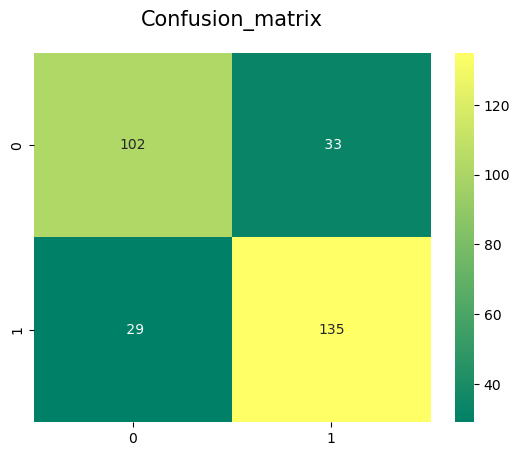

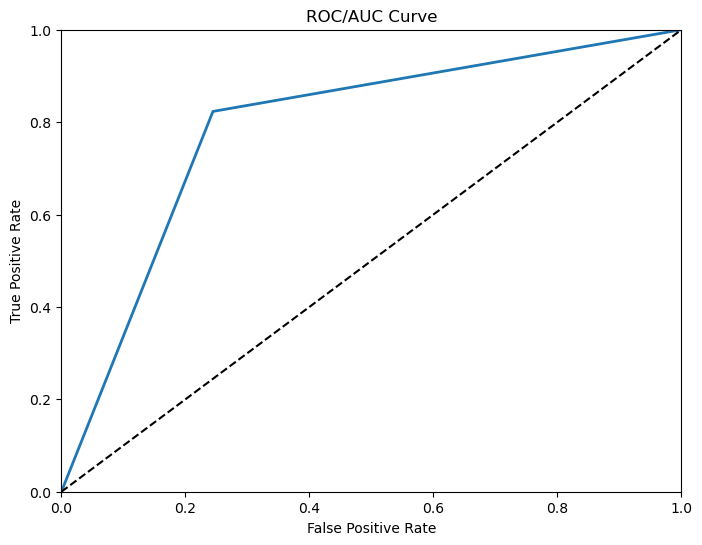

AUC Score: 0.7893631436314363


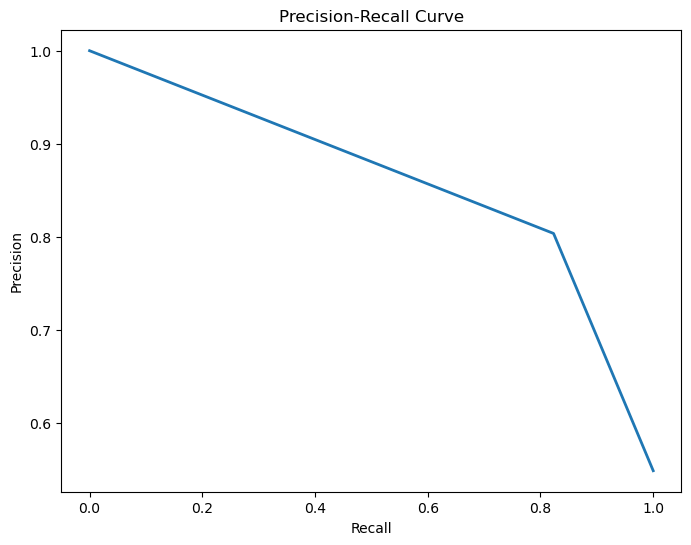

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       135
           1       0.80      0.82      0.81       164

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.79      0.79      0.79       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       111
           1       0.81      0.95      0.87       128

    accuracy                           0.85       239
   macro avg       0.87      0.85      0.85       239
weighted avg       0.86      0.85      0.85       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        36

    accuracy                           0.83        60
   mac

In [58]:
sns.heatmap(confusion_matrix(Targeted_feature,y_pred_dt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# ROC/AUC Curve Matrix
roc_auc(model_dt,all_features,Targeted_feature)
    

# precision_recall_curve
prc(Targeted_feature,y_pred_dt)

# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_pred_dt))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, model_dt.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, model_dt.predict(X_test)))



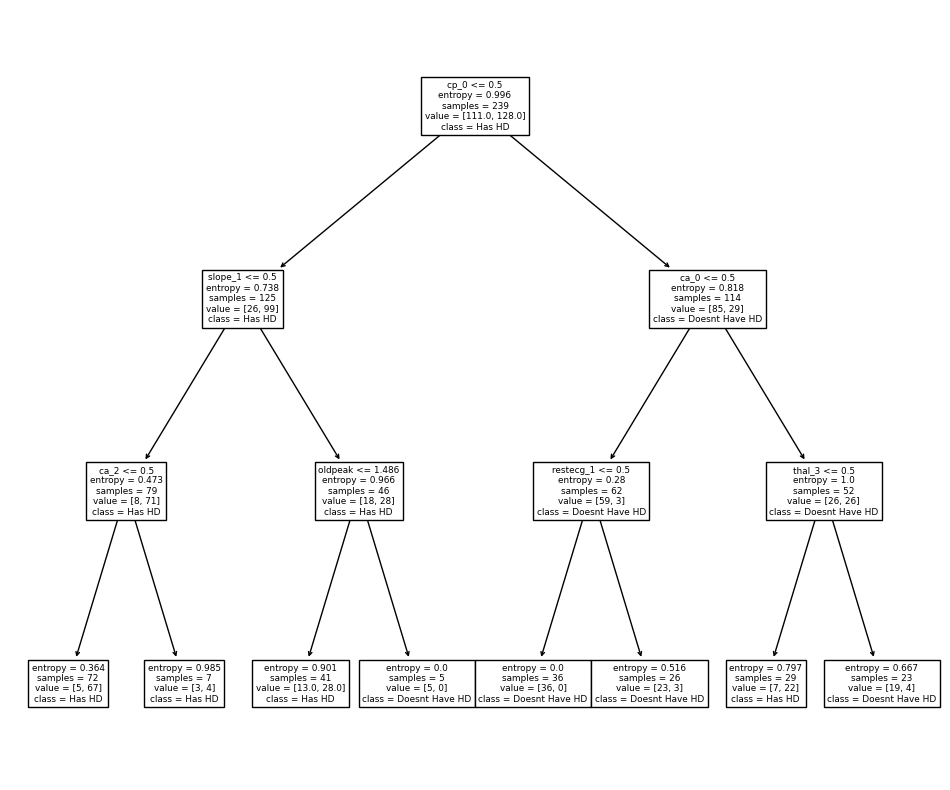

In [59]:
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(model_dt, feature_names=list(X_train.columns), class_names=['Doesn''t Have HD', 'Has HD'])
plt.show()

In [60]:
feature_names= list(X_train.columns)

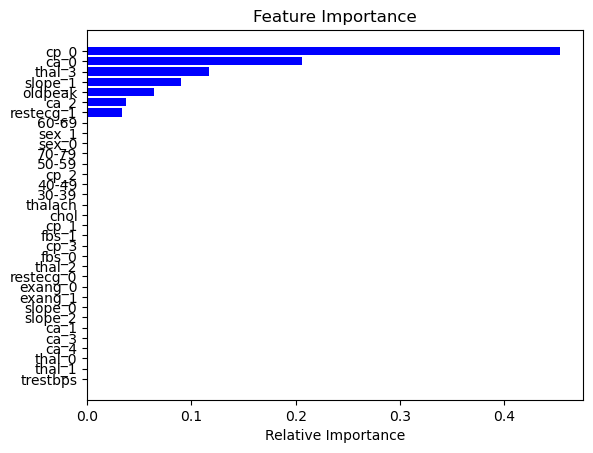

In [61]:
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## <font color='Blue'>4.SVM Classifier</font>   

In [62]:
# defining parameter range 
param_grid = {'C': [0.1, 1.0, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001 , 'scale'], 
              'kernel': [  'linear', 'poly', 'rbf', 'sigmoid']}  

grid_svc = GridSearchCV(SVC(), param_grid, cv=10,refit = True, verbose =  3 ,scoring='accuracy',n_jobs=-1)
# fitting the model for grid search 
grid_svc.fit(X_train,y_train)

print('Best parameters from Grid Search on subset: {}'.format(grid_svc.best_params_))
print('Best score: {}'.format(grid_svc.best_score_))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters from Grid Search on subset: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.8528985507246377


In [69]:
# Fit the model
modelSVM = SVC(C=10, gamma= 0.01 ,kernel='rbf')
modelSVM.fit(X_train, y_train)

# Prediction
prediction_svm = modelSVM.predict(X_test)


#Testin usin Test Data (Accuracy)
accuracy = accuracy_score(prediction_svm, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machine Classifier is', round(accuracy * 100, 2))


# validation usin Train Data
# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_svm = cross_val_score(modelSVM, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score for Support Vector Machines Classifier is:', round(result_svm.mean() * 100, 2))

# Cross-validated prediction
y_predSVM = cross_val_predict(modelSVM, all_features, Targeted_feature, cv=10)



--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machine Classifier is 86.67
The cross-validated score for Support Vector Machines Classifier is: 83.92


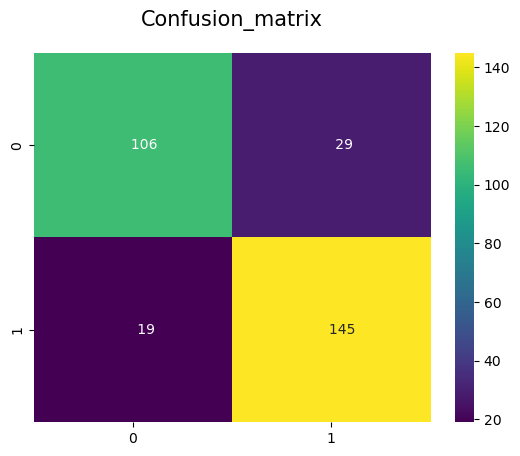

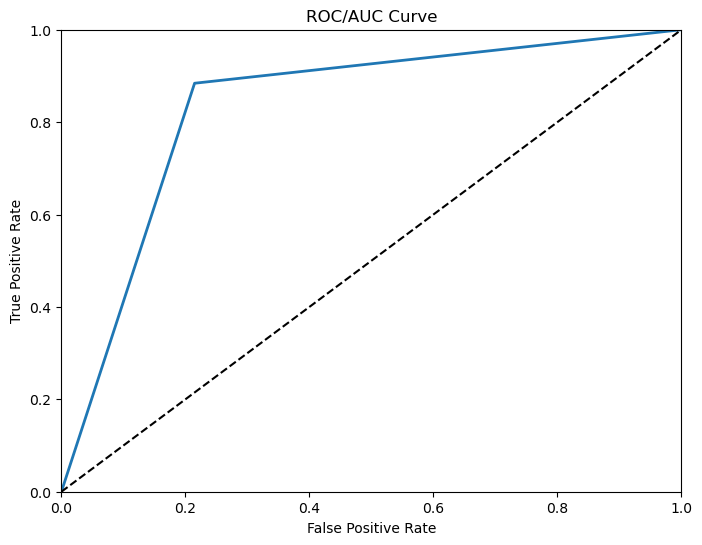

AUC Score: 0.8346657633243


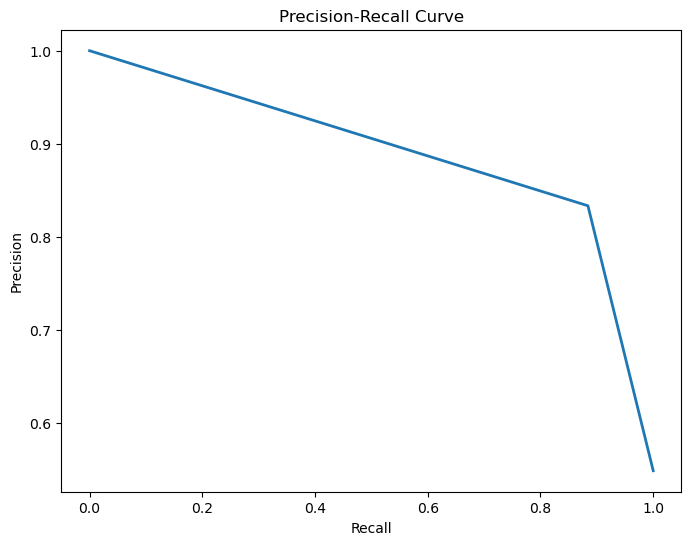

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       135
           1       0.83      0.88      0.86       164

    accuracy                           0.84       299
   macro avg       0.84      0.83      0.84       299
weighted avg       0.84      0.84      0.84       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       111
           1       0.87      0.91      0.89       128

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.89      0.89      0.89        36

    accuracy                           0.87        60
   mac

In [70]:
sns.heatmap(confusion_matrix(Targeted_feature, y_predSVM), annot=True, fmt='8.0f', cmap='viridis')
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(modelSVM,all_features,Targeted_feature)
    
# precision_recall_curve
prc(Targeted_feature,y_predSVM)
  



# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_predSVM))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, modelSVM.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, modelSVM.predict(X_test)))


## <font color='Blue'>5.Random Forest Classifier</font>   

In [71]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier , all_features, Targeted_feature, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

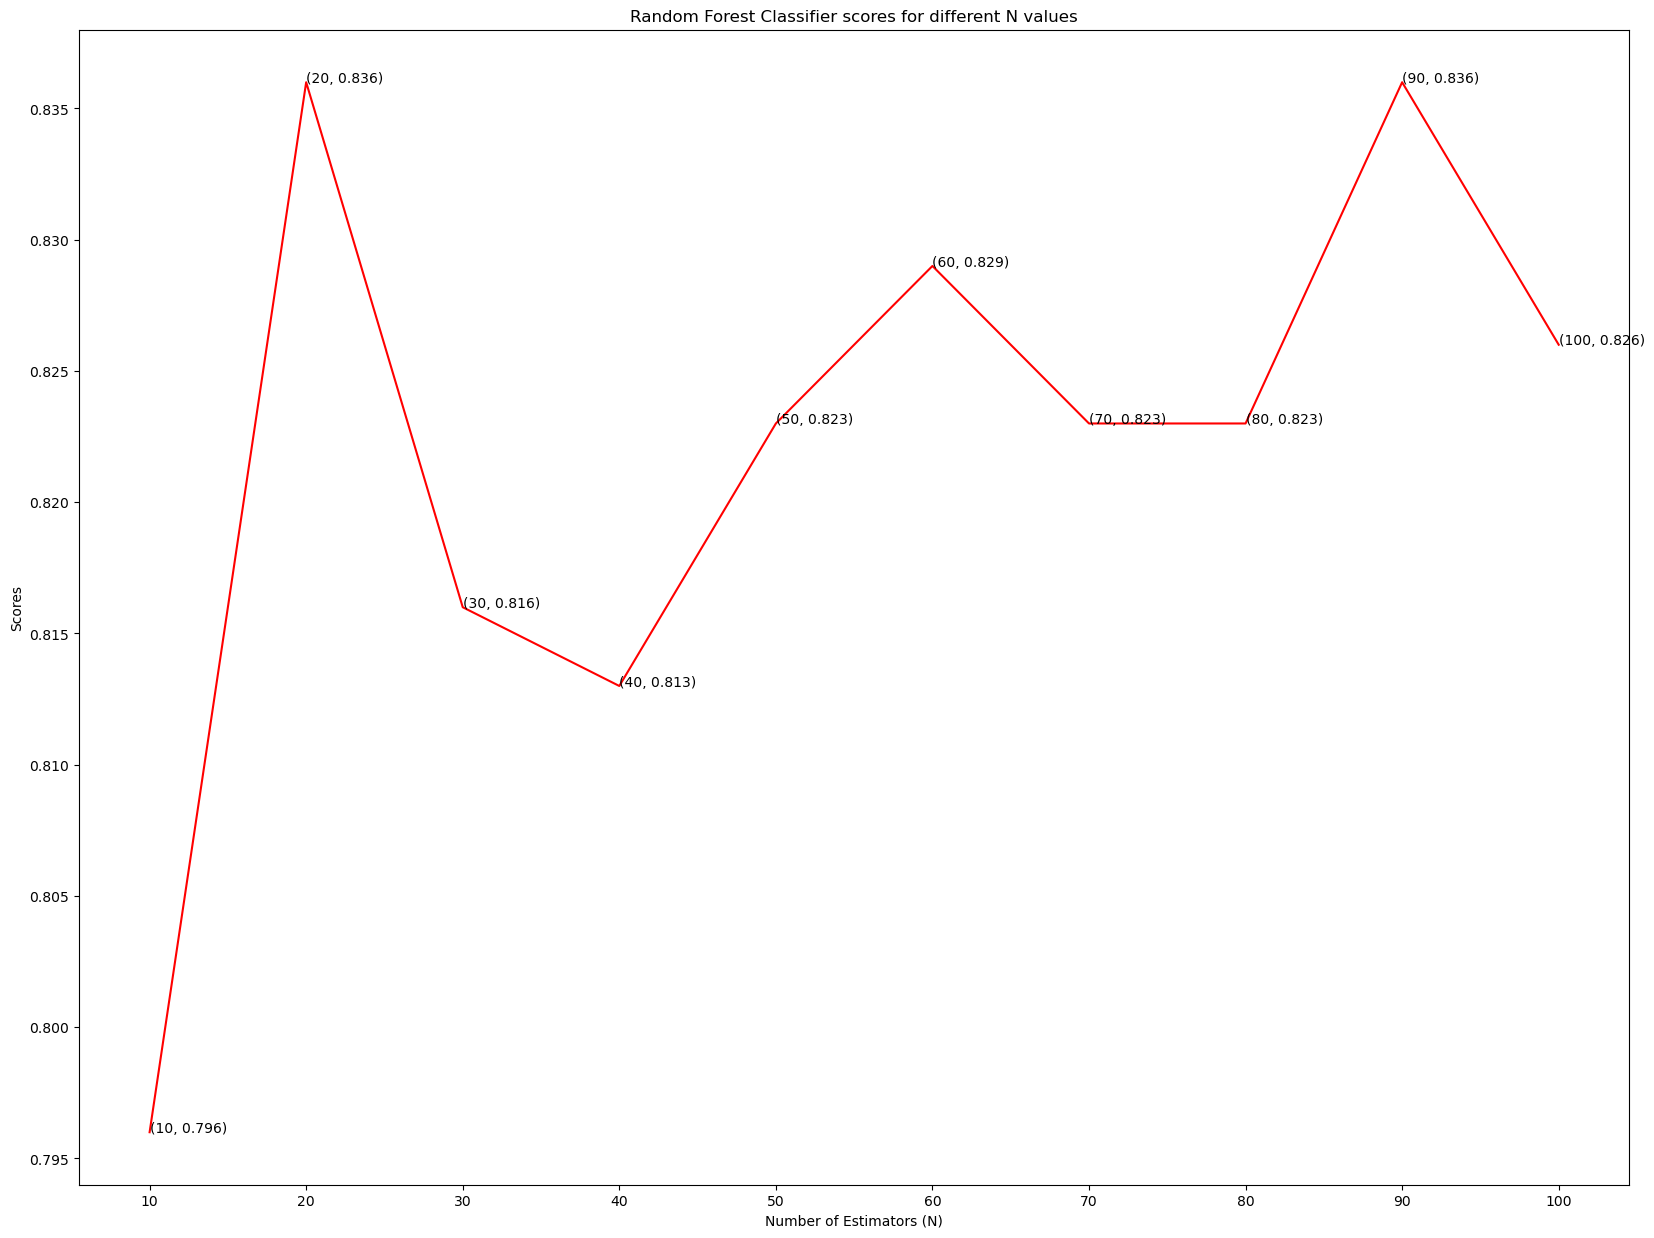

In [72]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [82]:
modelRF = RandomForestClassifier(n_estimators=20)

modelRF.fit(X_train, y_train)

# Prediction
prediction_RF = modelRF.predict(X_test)

# Accuracy
accuracy = accuracy_score(prediction_RF, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy * 100, 2))


# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_RF = cross_val_score(modelRF, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score for Random Forest Classifier is:', round(result_RF.mean() * 100, 2))


# Cross-validated prediction
y_pred_RF = cross_val_predict(modelRF, all_features, Targeted_feature, cv=10)



--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 88.33
The cross-validated score for Random Forest Classifier is: 82.25


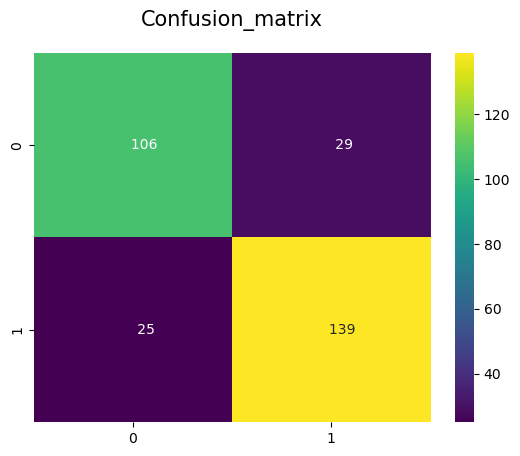

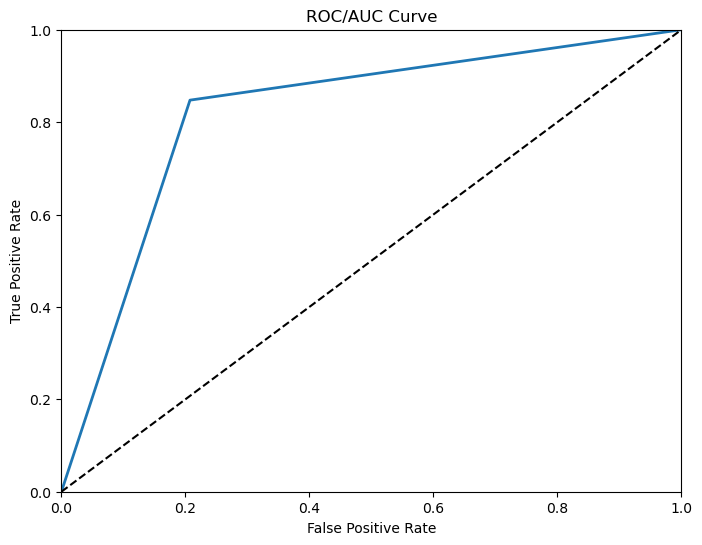

AUC Score: 0.8200767841011743


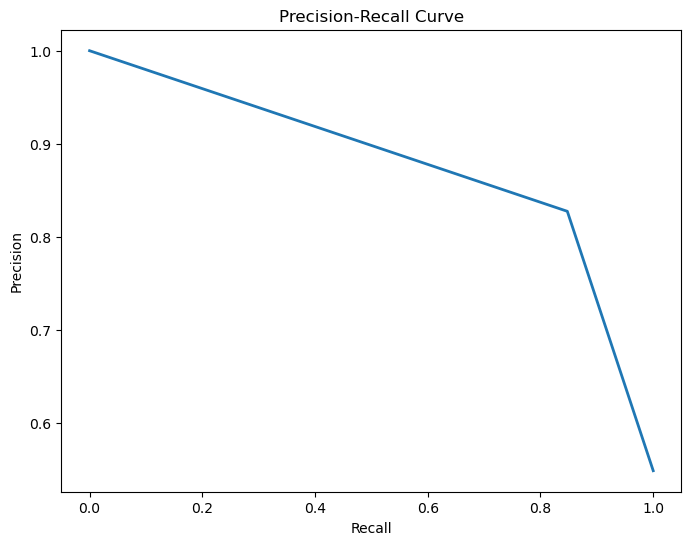

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       135
           1       0.83      0.85      0.84       164

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       128

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.91      0.89      0.90        36

    accuracy                           0.88        60
   mac

In [83]:
sns.heatmap(confusion_matrix(Targeted_feature, y_pred_RF), annot=True, fmt='8.0f', cmap='viridis')
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(modelRF,all_features,Targeted_feature)
    
# precision_recall_curve
prc(Targeted_feature,y_pred_RF)
  



# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_pred_RF))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, modelRF.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, modelRF.predict(X_test)))


## <font color='Blue'>6.Logistic Regression</font>   


In [75]:
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'] } # Penalty type}  

# Perform Grid Search Cross Validation
grid_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10, refit=True, verbose=3, scoring='accuracy', n_jobs=-1)
# fitting the model for grid search 
grid_LR.fit(X_train,y_train)

print('Best parameters from Grid Search on subset: {}'.format(grid_LR.best_params_))
print('Best score: {}'.format(grid_LR.best_score_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters from Grid Search on subset: {'C': 1, 'penalty': 'l2'}
Best score: 0.836050724637681


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\skl

In [76]:

modelLR = LogisticRegression(C=1, penalty='l2')

modelLR.fit(X_train, y_train)

# Prediction
prediction_LR = modelLR.predict(X_test)

# Accuracy
accuracy = accuracy_score(prediction_LR, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is', round(accuracy * 100, 2))


# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_LR = cross_val_score(modelLR, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score forLogistic Regression is:', round(result_LR.mean() * 100, 2))


# Cross-validated prediction
y_pred_LR = cross_val_predict(modelLR, all_features, Targeted_feature, cv=10)


--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 88.33
The cross-validated score forLogistic Regression is: 85.92


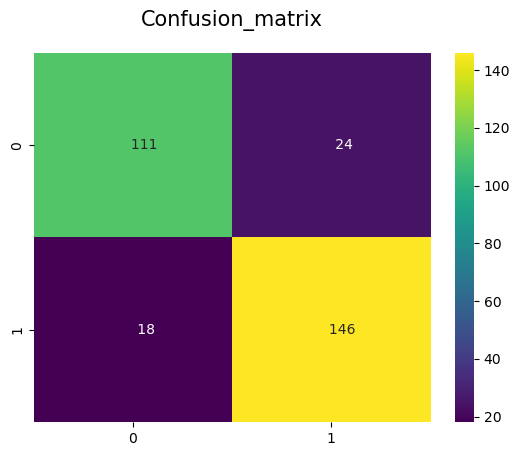

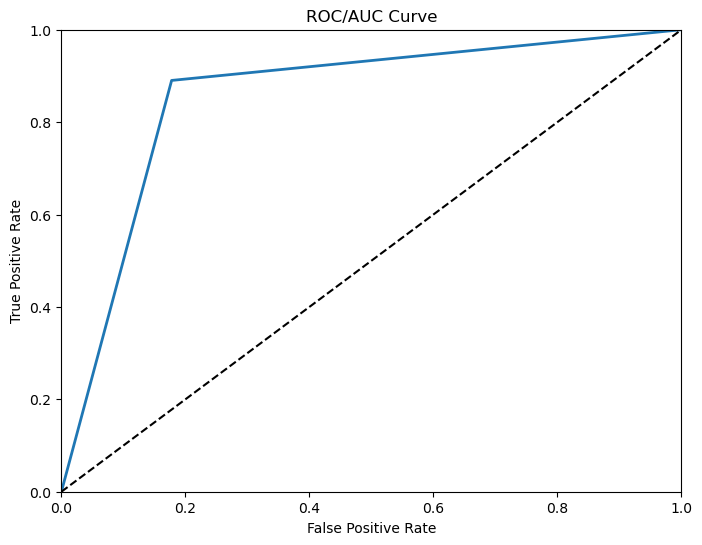

AUC Score: 0.8562330623306232


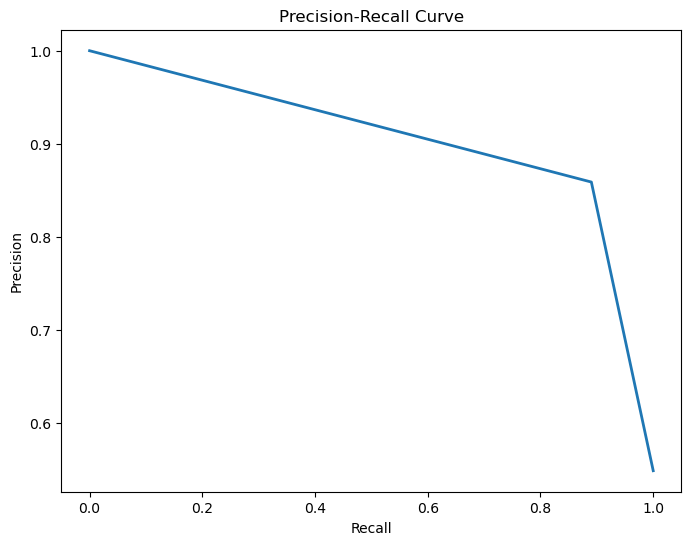

Classification Report for Predicted Labels:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       135
           1       0.86      0.89      0.87       164

    accuracy                           0.86       299
   macro avg       0.86      0.86      0.86       299
weighted avg       0.86      0.86      0.86       299


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       111
           1       0.86      0.90      0.88       128

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.90        36

    accuracy                           0.88        60
   mac

In [77]:
sns.heatmap(confusion_matrix(Targeted_feature, y_pred_LR), annot=True, fmt='8.0f', cmap='viridis')
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(modelLR,all_features,Targeted_feature)
    
# precision_recall_curve
prc(Targeted_feature,y_pred_LR)
  



# Classification Report for Predicted Labels
print("Classification Report for Predicted Labels:")
print(classification_report(Targeted_feature, y_pred_LR))

# Classification Report for Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, modelLR.predict(X_train)))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, modelLR.predict(X_test)))


# <font color='RED'>Models' Accuracy Comparison</font>   


In [96]:
model_scores = {
    'KNN': modelKNN.score(X_test, y_test),
    'Gaussian Naive Bayes': nb.score(X_test, y_test),
    'Decision Trees': model_dt.score(X_test, y_test),
    'SVM': modelSVM.score(X_test, y_test),
    'Random Forest': modelRF.score(X_test, y_test),
    'Logistic Regression': modelLR.score(X_test, y_test)
}


In [103]:
model_compare= pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,KNN,Gaussian Naive Bayes,Decision Trees,SVM,Random Forest,Logistic Regression
accuracy,0.85,0.866667,0.833333,0.866667,0.883333,0.883333


<Axes: >

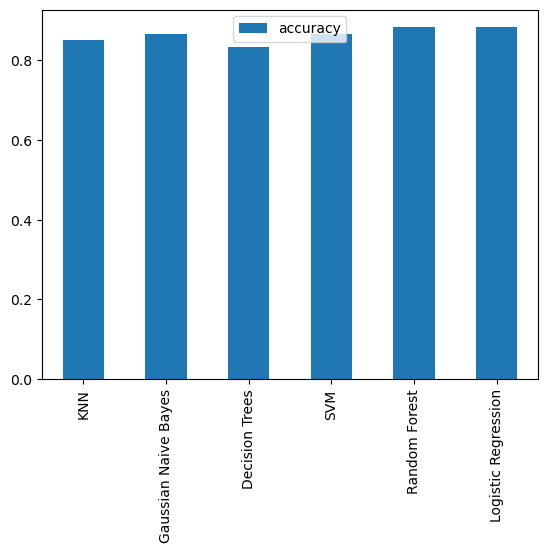

In [104]:
model_compare.T.plot(kind="bar")